<a href="https://colab.research.google.com/github/Amanr1996/Credit_card_Default_pred_Capstone_3/blob/main/ML_Classificatin_Credit_card_Default_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit card Deafault Prediction.



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of

This project aims to predict credit card default using a classification model. The dataset used is from a bank in Taiwan, which contains various demographic and financial attributes of their clients.

A variety of classification algorithms, such as logistic regression, decision tree, and random forest, are implemented to build predictive models. The models are evaluated using performance metrics such as accuracy, precision, recall, and F1 score.



Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement is that banks face significant risks associated with credit card defaults, which can result in substantial financial losses. Predicting credit card defaulters is therefore essential for banks to manage their credit risk, allocate resources effectively, and offer competitive rates to their customers.

The current challenge is that traditional credit risk assessment methods may not be sufficient to accurately predict credit card defaults. To address this problem, there is a need to develop advanced predictive analytics models that can leverage large amounts of data to identify patterns and trends that traditional methods may overlook.

The objective of this project is to develop a predictive model that can accurately forecast credit card defaults, allowing banks to make informed decisions on how much credit to extend to individuals and adjust interest rates based on the predicted risk. This model will also enable banks to proactively identify high-risk accounts and take preventative measures to reduce the risk of defaults.

By addressing this problem, the proposed solution can help banks optimize their credit risk management processes, reduce bad debt expenses, and promote financial stability for their customers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [392]:
!pip install scikit-learn==0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.22-cp39-cp39-linux_x86_64.whl size=23556408 sha256=94e51f44d20890c07e9dd6de51bbc8ac1bbef98c1fec1136aa5764595a334246
  Stored in directory: /root/.cache/pip/wheels/e7/12/1e/86d5527d8864a27433c021141ad54bfd87775982ea961f9c60
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
sklearn-pandas 2.

In [278]:
## Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [279]:
#Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [280]:
##Loading CSV file from google drive.
path = "/content/gdrive/MyDrive/Capstone_Project _3/default of credit card clients.csv"
df = pd.read_csv(path, header = 1)

### Dataset First View

In [281]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [282]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [283]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [284]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
duplicate_count

0

#### Missing Values/Null Values

In [285]:
# Missing Values/Null Values Count
missing_count = df.isnull().sum()
missing_count

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [286]:
# Visualizing the missing values


In [287]:
## lets find out the unique values in every columns

for col in df.columns:
  print(col,df[col].value_counts())

ID 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
LIMIT_BAL 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
SEX 2    18112
1    11888
Name: SEX, dtype: int64
EDUCATION 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
MARRIAGE 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
AGE 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54   

### What did you know about your dataset?

1. Data set having 25 column and 30000 rows.
2. There are no missing and no duplicate values.
3. All columns having Data Type integer.



## ***2. Understanding Your Variables***

In [288]:
# Dataset Columns
## lets find out the unique values in every columns

for col in df.columns:
  print("Column_Name ",col,df[col].value_counts())

Column_Name  ID 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
Column_Name  LIMIT_BAL 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
Column_Name  SEX 2    18112
1    11888
Name: SEX, dtype: int64
Column_Name  EDUCATION 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Column_Name  MARRIAGE 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Column_Name  AGE 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47  

In [289]:
# Dataset Describe

### Variables Description 

#There are 25 variables:

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [290]:
# Check Unique Values for each variable.
for col in df.columns:
  print("Column_Name ",col,df[col].value_counts())

Column_Name  ID 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
Column_Name  LIMIT_BAL 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
Column_Name  SEX 2    18112
1    11888
Name: SEX, dtype: int64
Column_Name  EDUCATION 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Column_Name  MARRIAGE 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Column_Name  AGE 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47  

## 3. ***Data Wrangling***

### Data Wrangling Code

first we will rename the data set so that it will be easy to understand.

In [291]:
# Write your code to make your dataset analysis ready.
# making dataframe more readable by creating new column names
rename_list = ['ID','max_credit_given', 'gender', 'education', 'marital_status', 'age','pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april','payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
print(rename_list)
print(len(rename_list))

print(df.columns)
print(len(df.columns))
## zipping the existing columns name and new columns name together, and converting into the dictionary
col_name = dict(zip(df.columns, rename_list))

['ID', 'max_credit_given', 'gender', 'education', 'marital_status', 'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april', 'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
25
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
25


In [292]:
## rename columns 
df = df.rename(columns = col_name)

In [293]:
## lets check the converted data set
df.head()

,ID,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [294]:
## lets see the catagorical values.
df[['gender','education','marital_status', 'age']].describe()

,gender,education,marital_status,age
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


In [295]:
## value count of gender columns.
df['gender'].value_counts()

2    18112
1    11888
Name: gender, dtype: int64

^Gender column is good codition

In [296]:
# Count the number of male and female customers
male_count = df['gender'][df['gender'] == 1].count()
female_count = df['gender'][df['gender'] == 0].count()

# Calculate the percentages
total_count = df.shape[0]
male_percent = 100 * (male_count / total_count)
female_percent = 100 - male_percent

# Print the results
print("Male percentage: {:.2f}%".format(male_percent))
print("Female percentage: {:.2f}%".format(female_percent))

Male percentage: 39.63%
Female percentage: 60.37%


Percentage of male and female defaulters

In [297]:
# Calculate the number of male defaulters
male_defaulter = df['default'][df['gender'] == 1].sum()

# Calculate the number of female defaulters
female_defaulter = df['default'][df['gender'] == 2].sum()

## Total Number of defaulters
total_defaulters  = male_defaulter + female_defaulter
# Print the results
print(f"Percentage of of male defaulters: {(male_defaulter/total_defaulters)*100} %")
print(f"Percentage of of female defaulters: {(female_defaulter/total_defaulters)*100} %")

Percentage of of male defaulters: 43.29415310427969 %
Percentage of of female defaulters: 56.70584689572031 %


In [298]:
## value count of gender columns.
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

in this column we know that the 4 representing others and 0, 5 and 6 representing unknown

we will  replace 0, 5 and 6 with 4 so we can have only 4 categories 

In [299]:
df.columns

Index(['ID', 'max_credit_given', 'gender', 'education', 'marital_status',
       'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default'],
      dtype='object')

In [300]:
## lets replace the value by using replace method
df['education'] =  df['education'].replace([0,6,5],4)

In [301]:
## checking  value count in education column
df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [302]:
## Checking value count in marital status column
df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

sale issue with education column here aslo we have extra category 

we will combine both 3 and 3 together

In [303]:
## we will relace zero with 3
df["marital_status"] = df["marital_status"].replace(0,3)

In [304]:
df[ 'age'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: age, dtype: int64

#we have to answer following questions.
1. Which Age group uses Credit card the most??
2. Which age group having maximum default payment?
3. Which age group of female having maximum default payments?
4. Which age group of male having maximum default payment

which age group having maximum default payment?

In [305]:
new_df = df[['age','gender','marital_status','default']]
new_df

,age,gender,marital_status,default
0,24,2,1,1
1,26,2,2,1
2,34,2,2,0
3,37,2,1,0
4,57,1,1,0
...,...,...,...,...
29995,39,1,1,0
29996,43,1,2,0
29997,37,1,2,1
29998,41,1,1,1


In [306]:
# define age ranges
# calculate age ranges
age_min = new_df['age'].min()
age_max = new_df['age'].max()
age_step = 5
age_ranges = [(i, i+age_step) for i in range(age_min, age_max, age_step)]

# create a new column for age range
new_df['age_range'] = pd.cut(new_df['age'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]])

# group the data by age range
grouped = new_df.groupby('age_range')


<ipython-input-306-2301d421798d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age_range'] = pd.cut(new_df['age'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]])


* Which age group of male having maximum default payment

In [307]:
## creating data frame for Male Defaulters' 
male_df = new_df[['age_range','gender','default']][new_df['gender'] == 1]
male_df

,age_range,gender,default
4,"(56, 61]",1,0
5,"(36, 41]",1,0
6,"(26, 31]",1,0
9,"(31, 36]",1,0
13,"(26, 31]",1,1
...,...,...,...
29995,"(36, 41]",1,0
29996,"(41, 46]",1,0
29997,"(36, 41]",1,1
29998,"(36, 41]",1,1


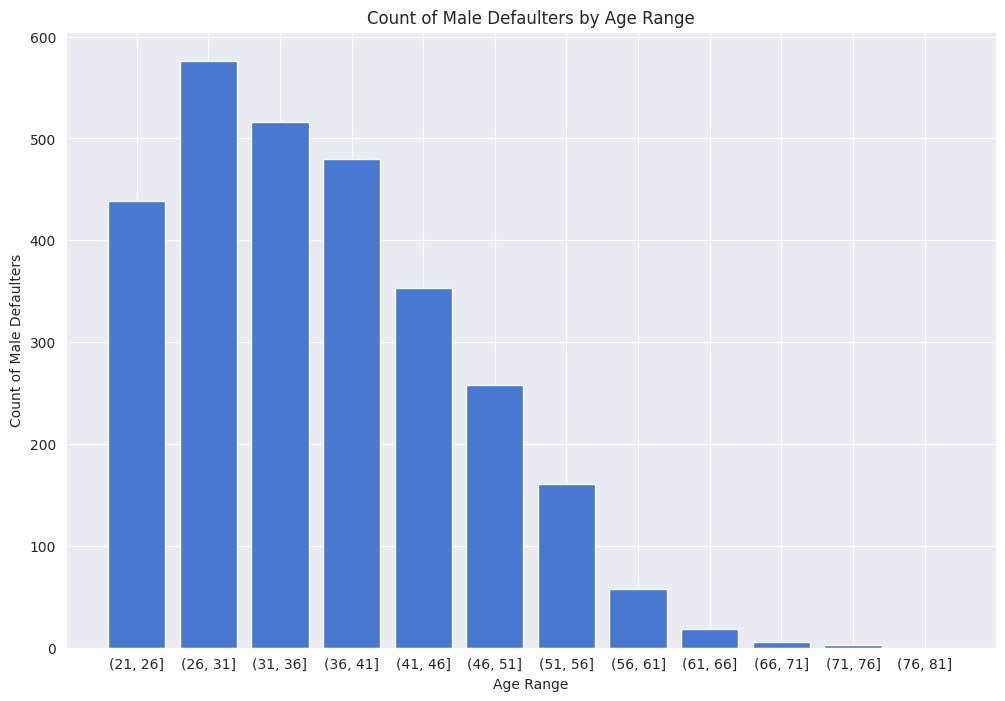

In [308]:
# group the data by age range
grouped = male_df.groupby('age_range')


# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of Male Defaulters')
plt.title('Count of Male Defaulters by Age Range')
plt.show()

which Age group uses Credit card the most??

In [309]:
new_df['age_range'].value_counts()

(26, 31]    7103
(31, 36]    5687
(21, 26]    5060
(36, 41]    4633
(41, 46]    3351
(46, 51]    2170
(51, 56]    1263
(56, 61]     450
(61, 66]     155
(66, 71]      49
(71, 76]      11
(76, 81]       1
Name: age_range, dtype: int64

<Axes: >

<Figure size 1000x800 with 0 Axes>

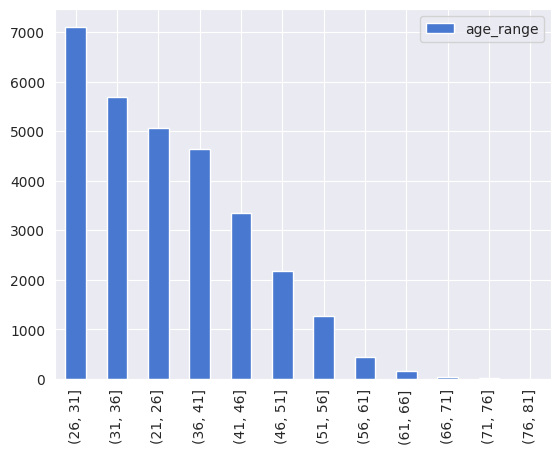

In [310]:
## Age group count
plt.figure(figsize = (10,8))
pd.DataFrame(new_df['age_range'].value_counts()).plot(kind="bar")

* which age group of female having maximum default payments?

In [311]:
## creating dataframe for Male Defaulters' 
female_df = new_df[['age_range','gender','default']][new_df['gender'] == 2]
female_df

,age_range,gender,default
0,"(21, 26]",2,1
1,"(21, 26]",2,1
2,"(31, 36]",2,0
3,"(36, 41]",2,0
7,"(21, 26]",2,0
...,...,...,...
29180,"(56, 61]",2,1
29181,"(56, 61]",2,0
29182,"(51, 56]",2,0
29185,"(51, 56]",2,0


In [312]:
# group the data by age range
grouped = female_df.groupby('age_range')

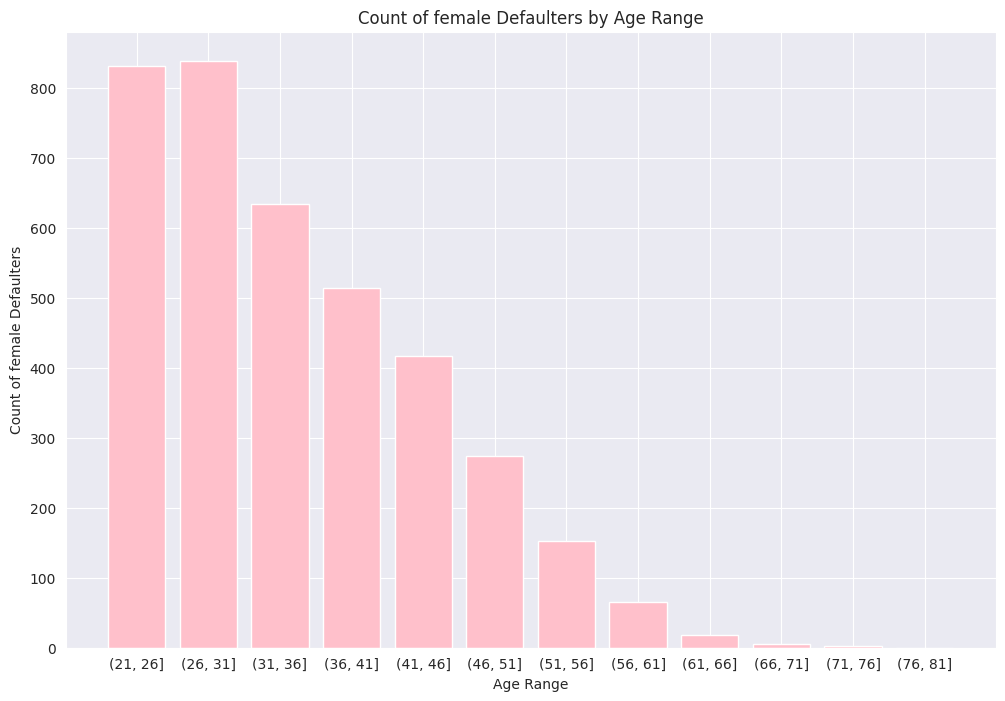

In [313]:
# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts, color = "pink")
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of female Defaulters')
plt.title('Count of female Defaulters by Age Range')
plt.show()

### What all manipulations have you done and insights you found?

* We rename the data set so that it become readable.
* Total Males percentage: 39.63%
* Total Female percentage: 60.37%
* Percentage of of male defaulters: 43.29415310427969 %
* Percentage of of female defaulters: 56.70584689572031 %

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 7

which Age group uses Credit card the most??

In [314]:
# Chart - 7 visualization code

<Axes: >

<Figure size 1000x800 with 0 Axes>

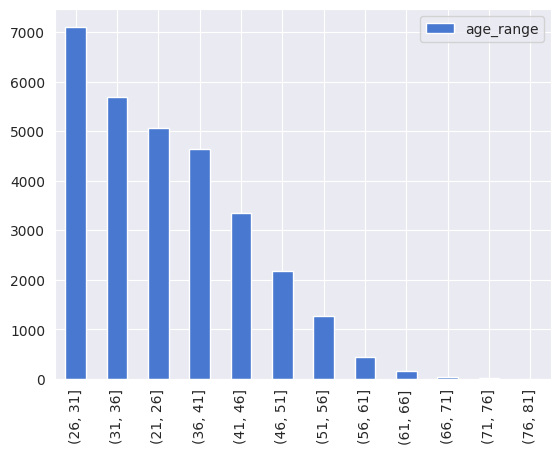

In [315]:
## Age group count
plt.figure(figsize = (10,8))
pd.DataFrame(new_df['age_range'].value_counts()).plot(kind="bar")

##### 1. Why did you pick the specific chart?

We use this chart to plot the count of age group which uses creditcard.

##### 2. What is/are the insight(s) found from the chart?

* The age group between 26-30 uses credit cards the most, followed by the age group between 31-36, and then the age group between 21-26. 

* Additionally, it seems that the age group between 51-66 has the lowest number of credit card users.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Target marketing efforts towards the age groups that use credit cards the most.

* Age groups between 26-30 and 31-36 are the biggest credit card users, banks could consider creating targeted marketing campaigns that appeal to these age groups. These campaigns could focus on benefits such as cashback rewards, travel perks, or other incentives that are attractive to younger consumers.

#### Chart - 8

which age group having maximum default payment?

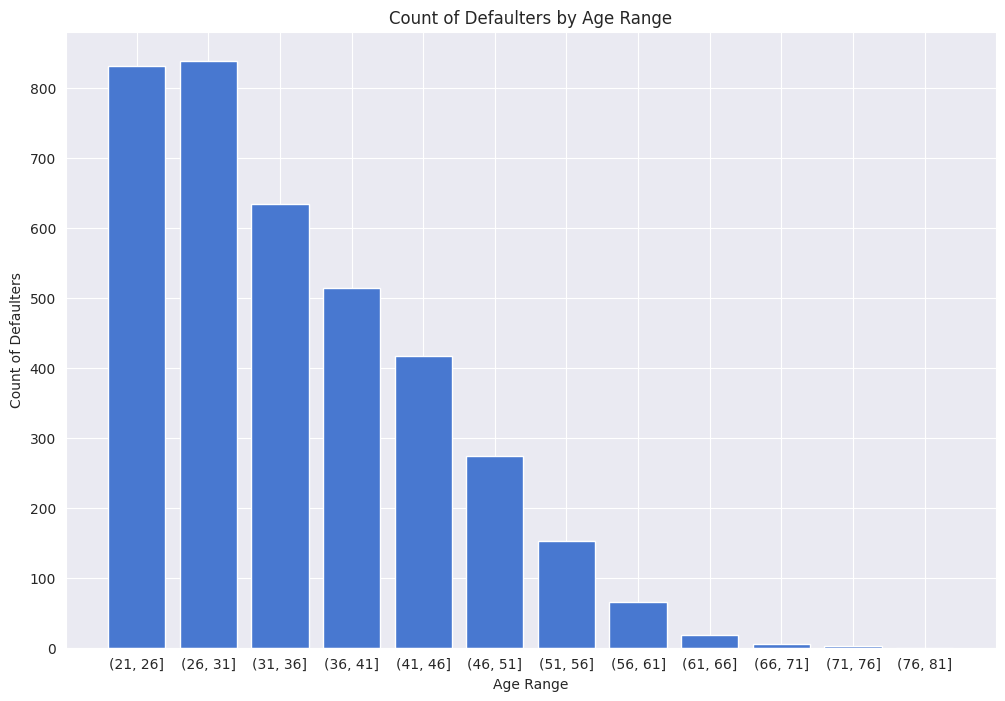

In [316]:
# Chart - 8 visualization code
# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of Defaulters')
plt.title('Count of Defaulters by Age Range')
plt.show()

##### 1. Why did you pick the specific chart?

Here we are intended to show the defaulters age group.

##### 2. What is/are the insight(s) found from the chart?

* Maximum Defulter are in the age group of 21 to 31  then followed by 31 to 40 age group

#### Chart - 9

* Which age group of male having maximum default payment

In [317]:
# Chart - 9 visualization code

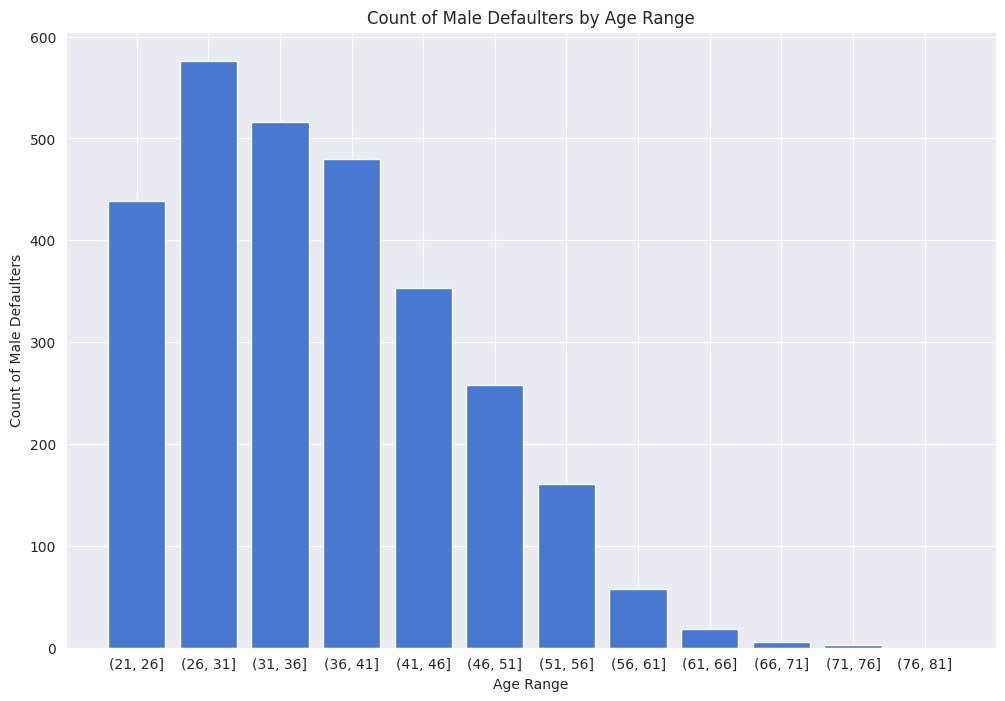

In [318]:
# group the data by age range
grouped = male_df.groupby('age_range')


# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of Male Defaulters')
plt.title('Count of Male Defaulters by Age Range')
plt.show()

#### Chart - 1

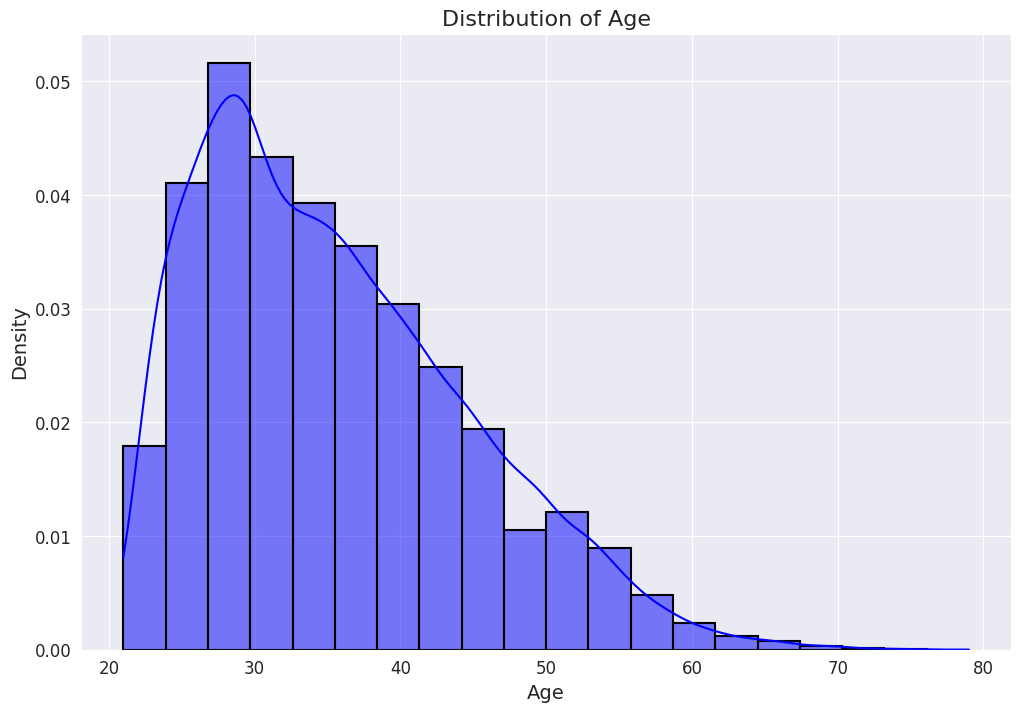

In [319]:
# Chart - 1 visualization codeplt
# Set style and color palette
sns.set_style('darkgrid')
sns.set_palette('muted')

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot histogram with KDE
sns.histplot(data=df, x='age', kde=True,
             color='blue', edgecolor='black', linewidth=1.5,
             stat='density', fill=True, alpha=0.5, cumulative=False,
             bins=20, binwidth=None, binrange=None, discrete=False,
             shrink=1, multiple='layer', element='bars',
             hue=None, hue_order=None, hue_norm=None)

# Set labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Distribution of Age', fontsize=16)

# Set tick parameters
ax.tick_params(axis='both', labelsize=12)

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* We can clearly see that the Data is right skewed.

#### Chart - 2

<Axes: xlabel='education', ylabel='count'>

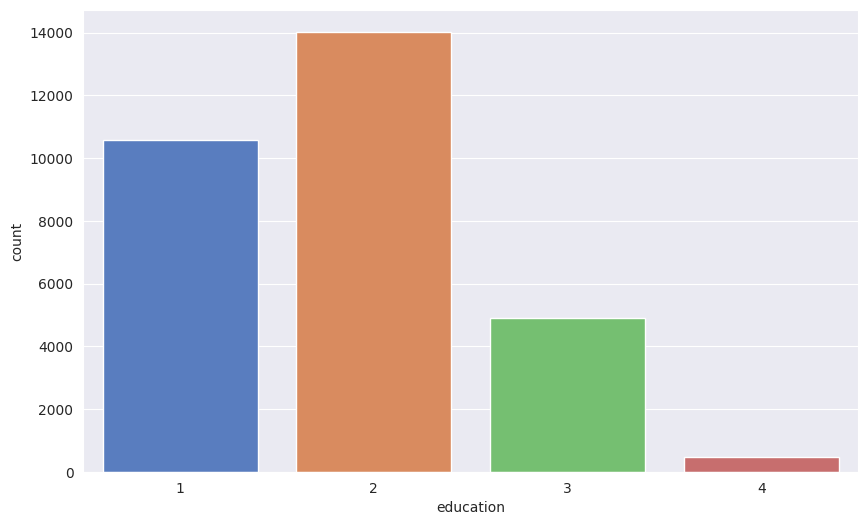

In [320]:
# Chart - 2 visualization code
plt.figure(figsize = (10,6))
sns.countplot(x='education', data=df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: xlabel='education'>

<Figure size 1000x600 with 0 Axes>

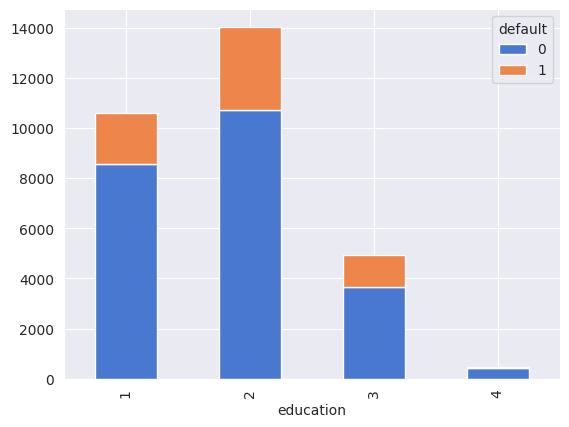

In [321]:
# Chart - 3 visualization code
plt.figure(figsize = (10,6))
pd.crosstab(df['education'], df['default']).plot(kind='bar', stacked=True)



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='max_credit_given', ylabel='age'>

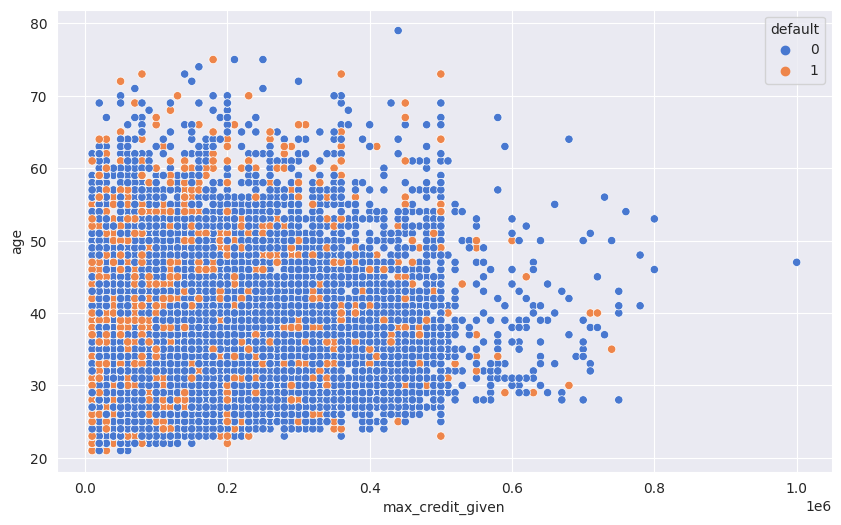

In [322]:
# Chart - 4 visualization code
plt.figure(figsize = (10,6))
sns.scatterplot(x='max_credit_given', y='age', hue='default', data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='default', ylabel='count'>

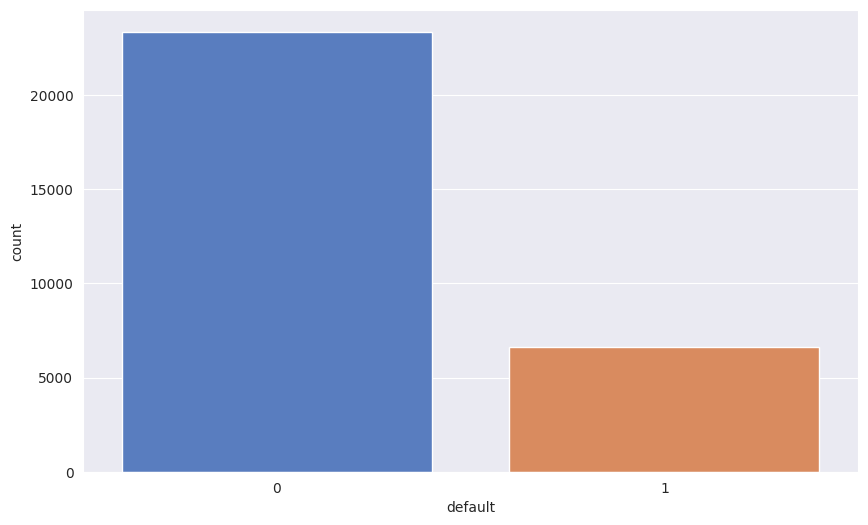

In [323]:
# Chart - 5 visualization code
plt.figure(figsize = (10,6))
sns.countplot(x='default', data=df)

Defaulters Percentage from total customers.

In [324]:
## Default Percentage 
Default_count = df["default"][df["default"] == 1].value_counts()
Default_count

1    6636
Name: default, dtype: int64

In [325]:
## Default percentage
default_percentage = (Default_count / df.shape[0]) * 100

print("Defaul_percentage % :", default_percentage)

Defaul_percentage % : 1    22.12
Name: default, dtype: float64


##### 1. Why did you pick the specific chart?

* From Barchart representation we can clearly see the deference between the value counts.


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Here we can see the inbalance in the data

* 22.12% defaulters in total customers.

* 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

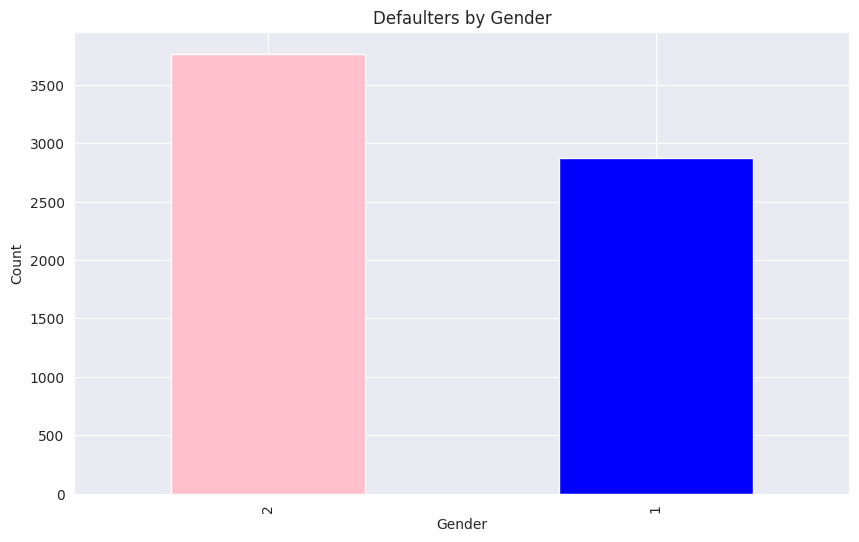

In [326]:
# Chart - 6 visualization code

# Get the value counts of male and female defaulters
male_female_defaulters = df['gender'][df['default'] == 1].value_counts()

# Plot the bar chart with custom colors
plt.figure(figsize = (10,6))
colors = ['pink','blue']
male_female_defaulters.plot(kind='bar', color=colors)

# Set the title and labels
plt.title('Defaulters by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

bar chart with blue bars for male defaulters and pink bars for female defaulters.

##### 1. Why did you pick the specific chart?

We Use Bar Chart to easily distinguish between male and female.

##### 2. What is/are the insight(s) found from the chart?

As we can clearly se that the female deafulter count is higher than male defaulters

Befor making any type of conclusions we need to dig deeper to find the reasion why female count is higher?

# Male female count percentage in total customers count.
* Male percentage: 39.63%

* Female percentage: 60.37%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Probablity distribution for ID


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


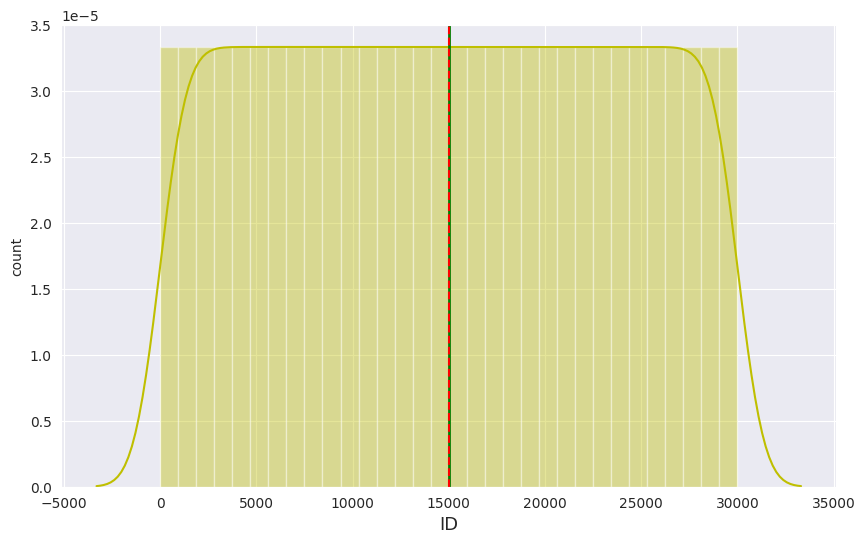

Probablity distribution for max_credit_given


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


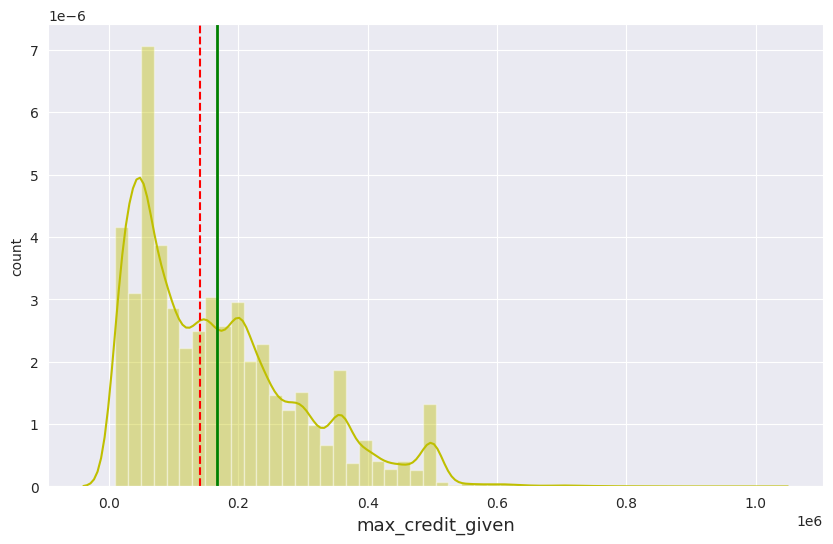

Probablity distribution for education


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


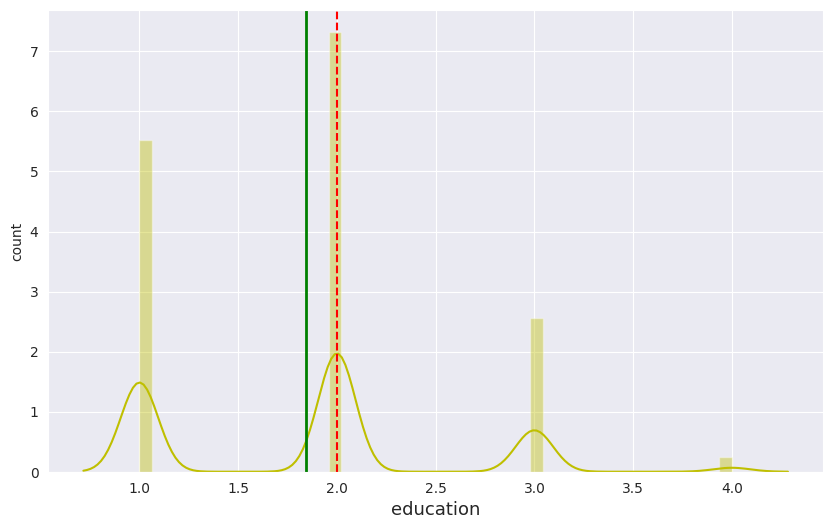

Probablity distribution for pay_status_sept


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


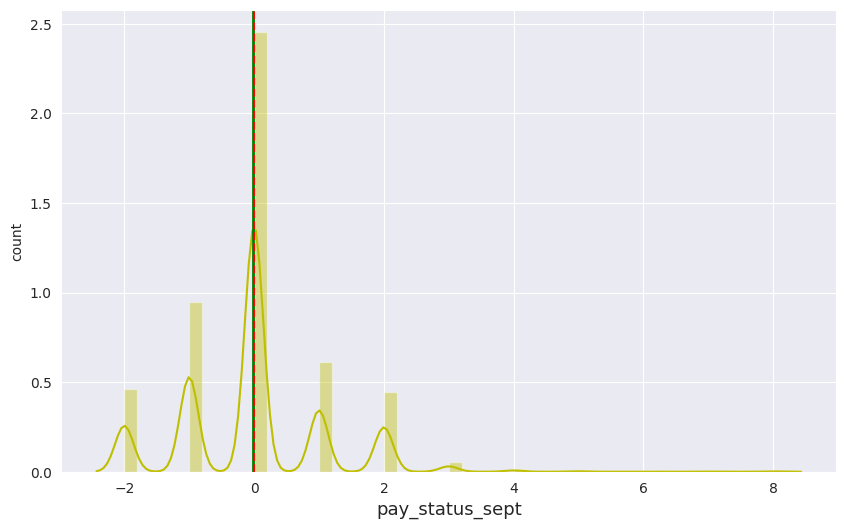

Probablity distribution for pay_status_aug


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


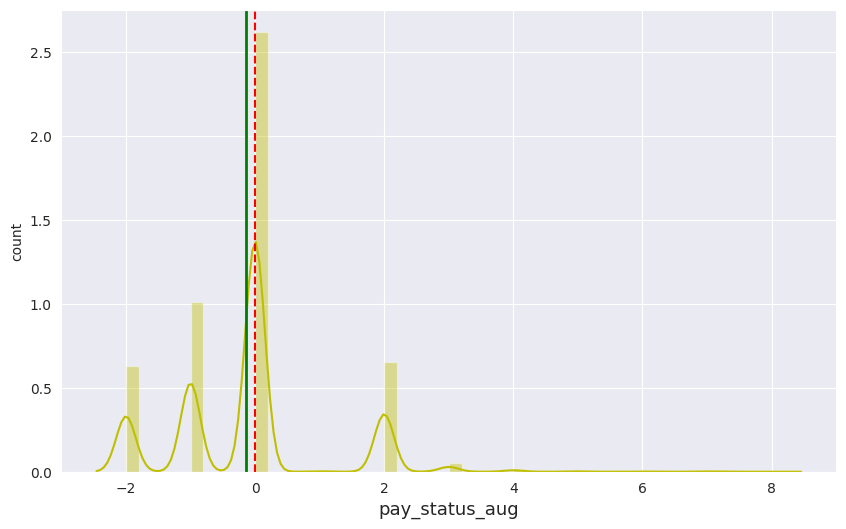

Probablity distribution for pay_status_july


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


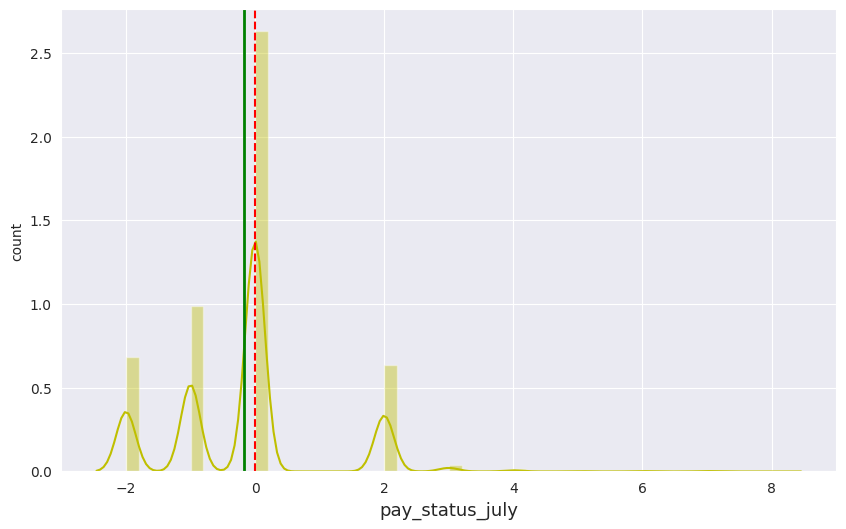

Probablity distribution for pay_status_june


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


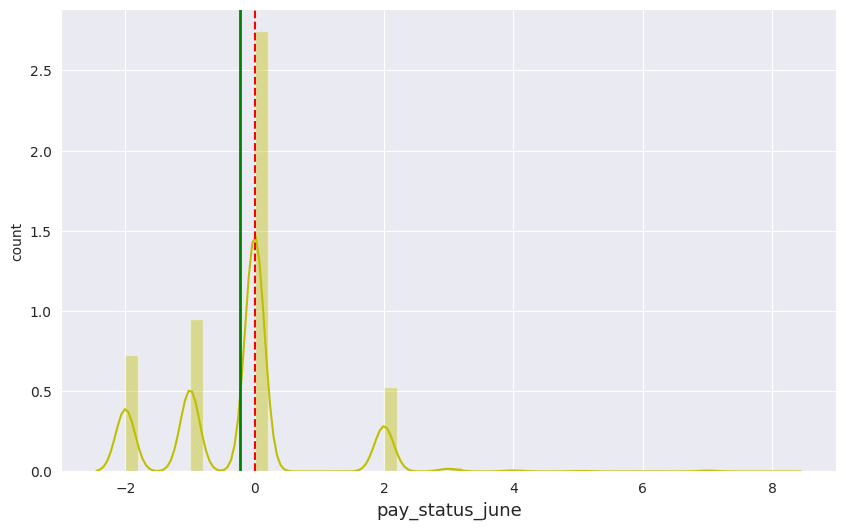

Probablity distribution for pay_status_may


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


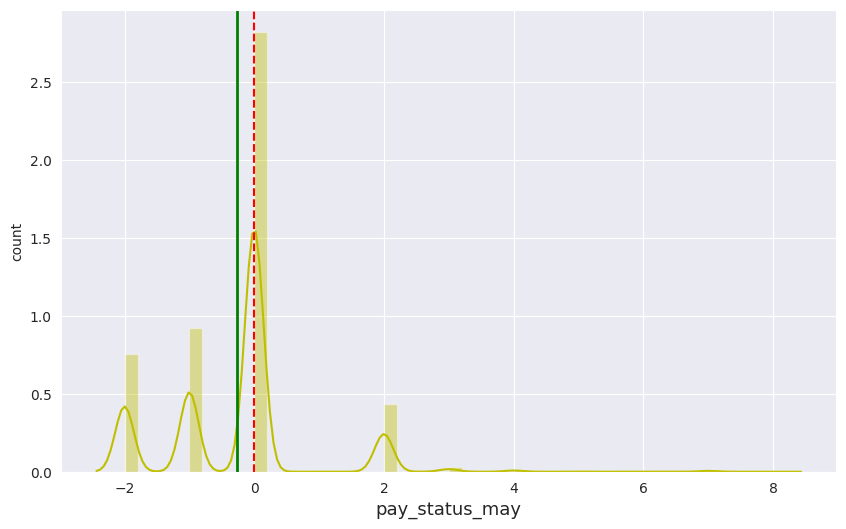

Probablity distribution for pay_status_april


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


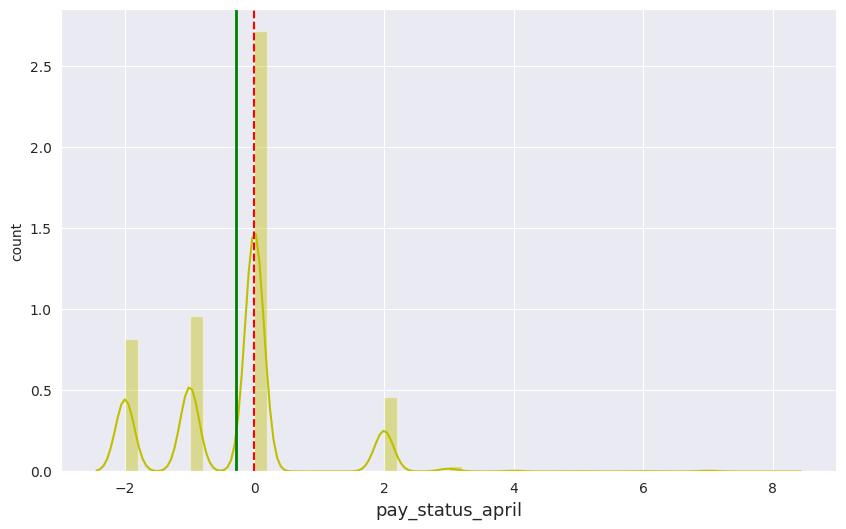

Probablity distribution for bill_sept


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


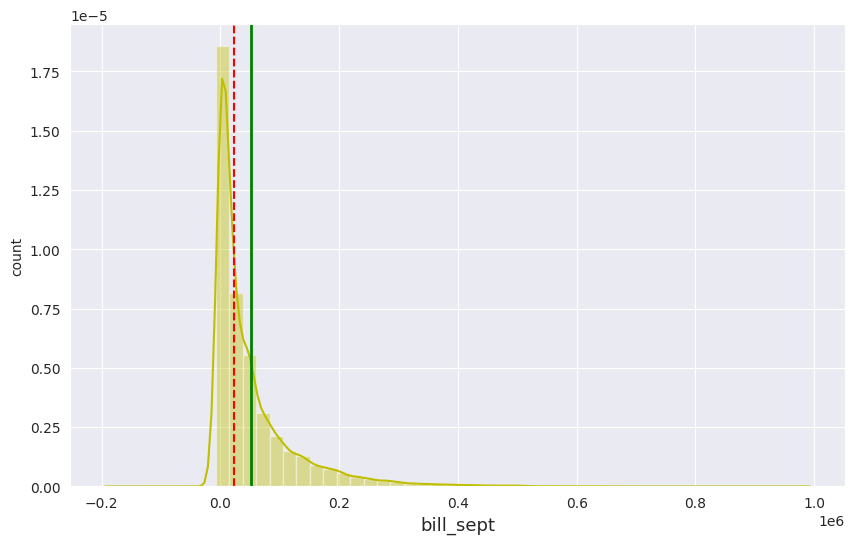

Probablity distribution for bill_aug


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


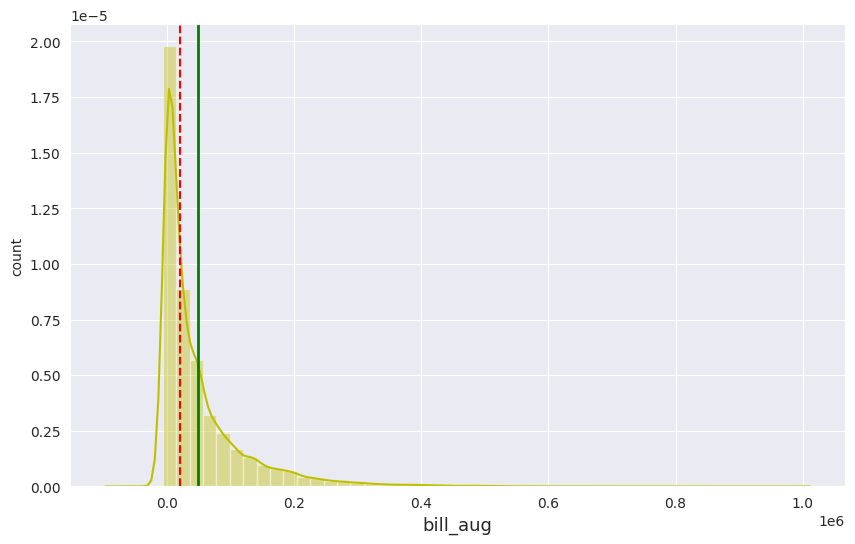

Probablity distribution for bill_july


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


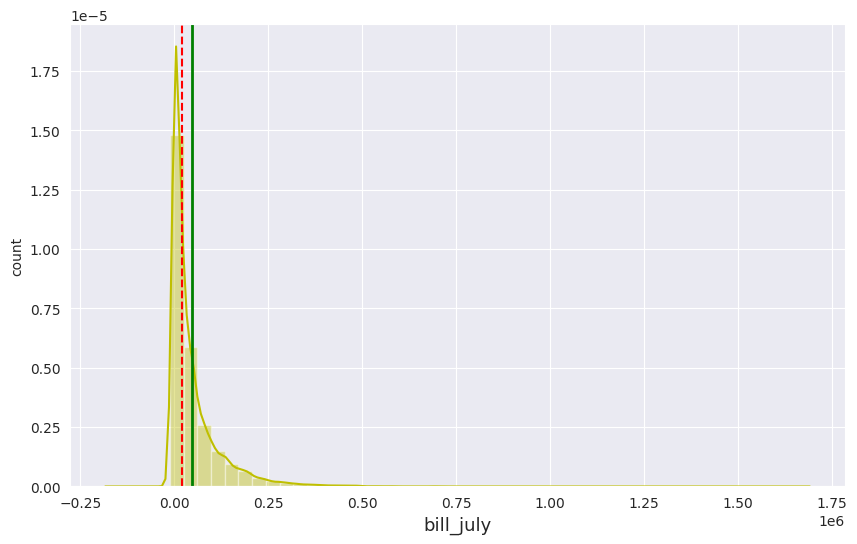

Probablity distribution for bill_june


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


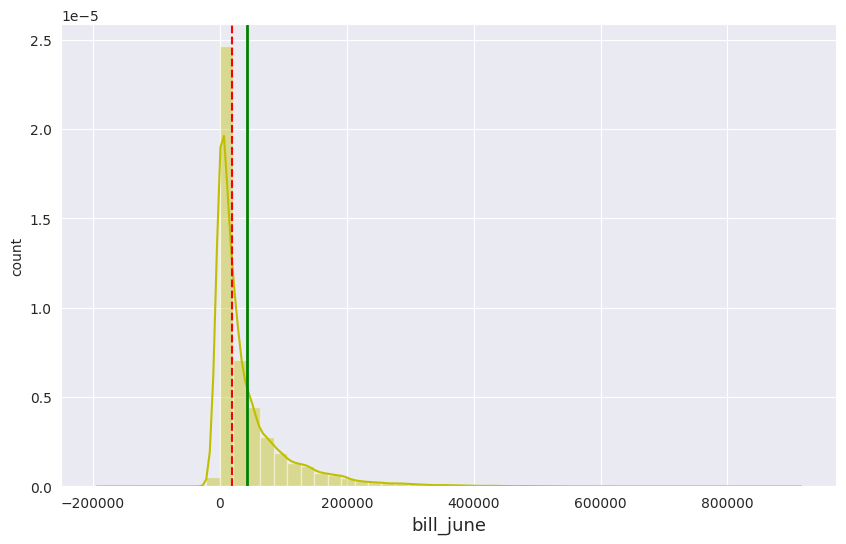

Probablity distribution for bill_may


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


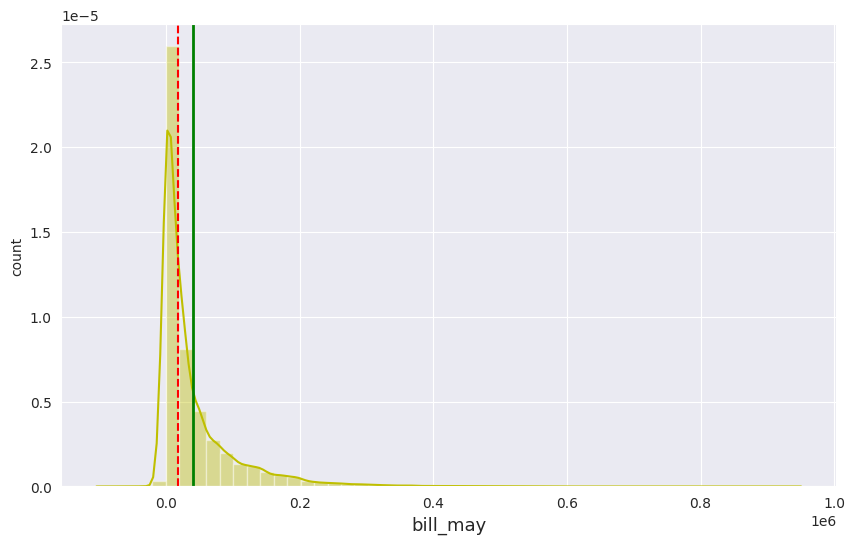

Probablity distribution for bill_april


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


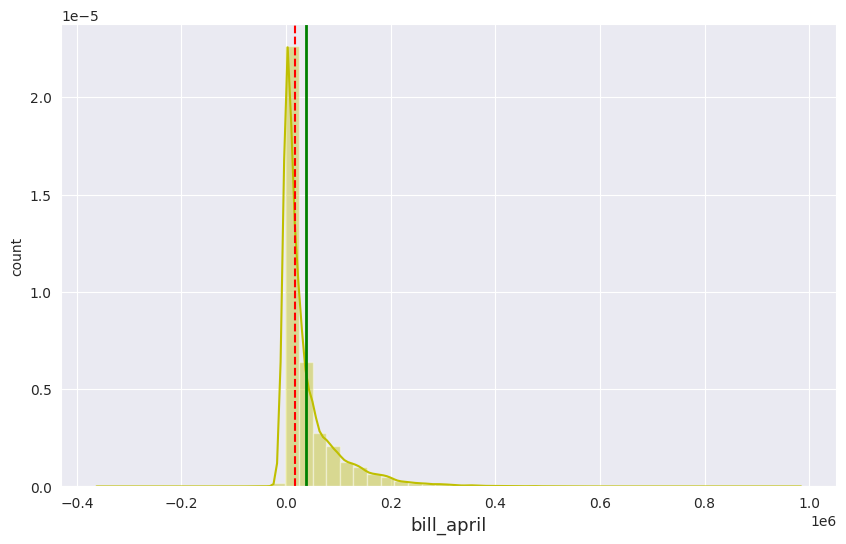

Probablity distribution for payment_sept


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


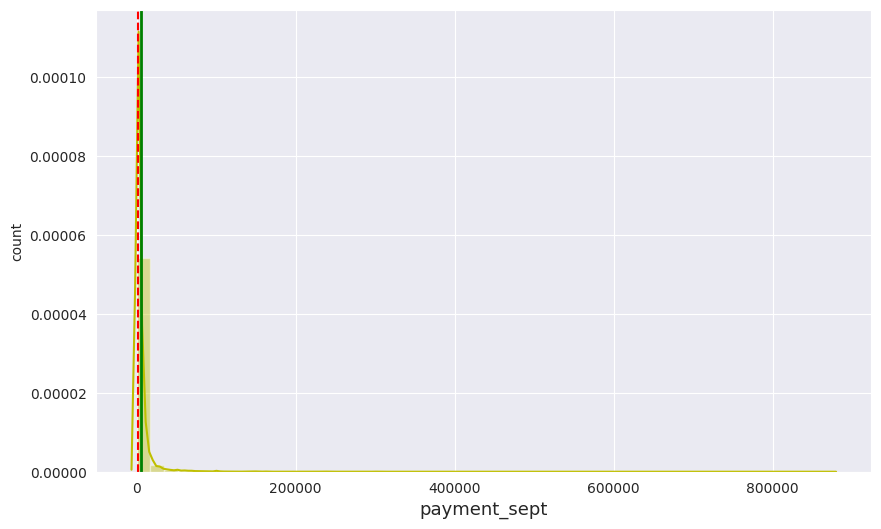

Probablity distribution for payment_aug


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


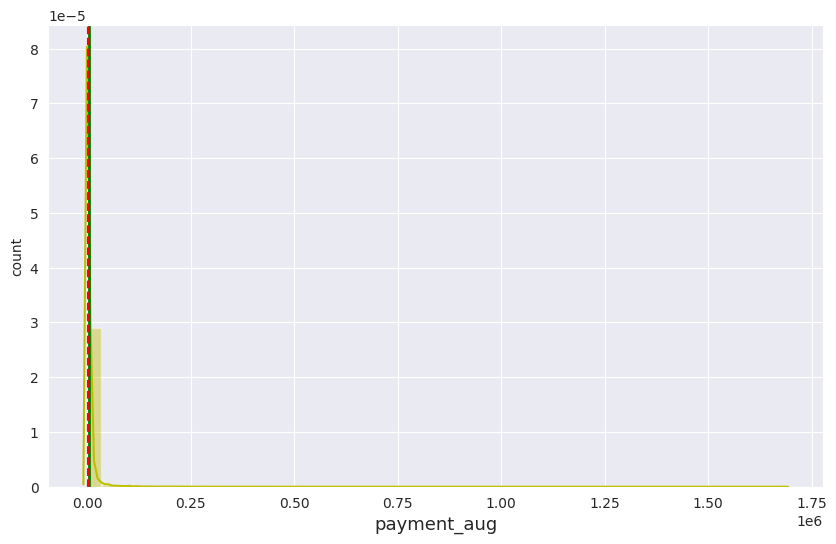

Probablity distribution for payment_jul


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


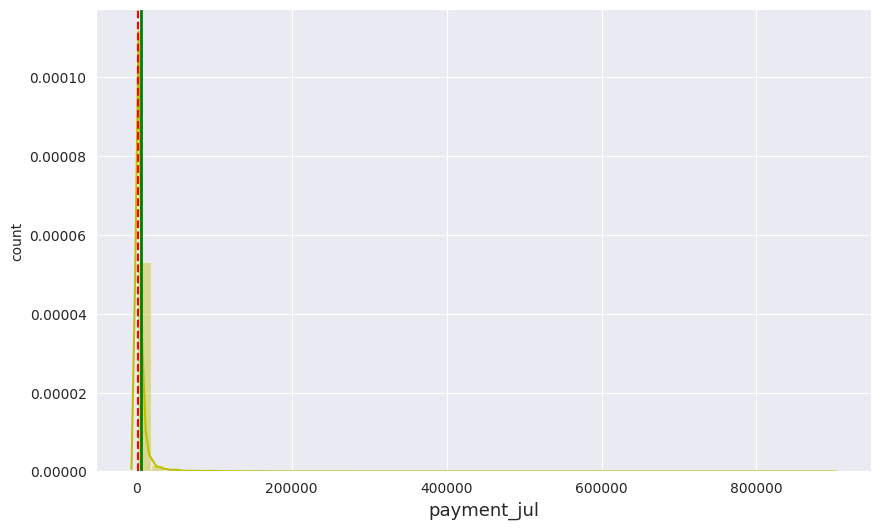

Probablity distribution for payment_jun


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


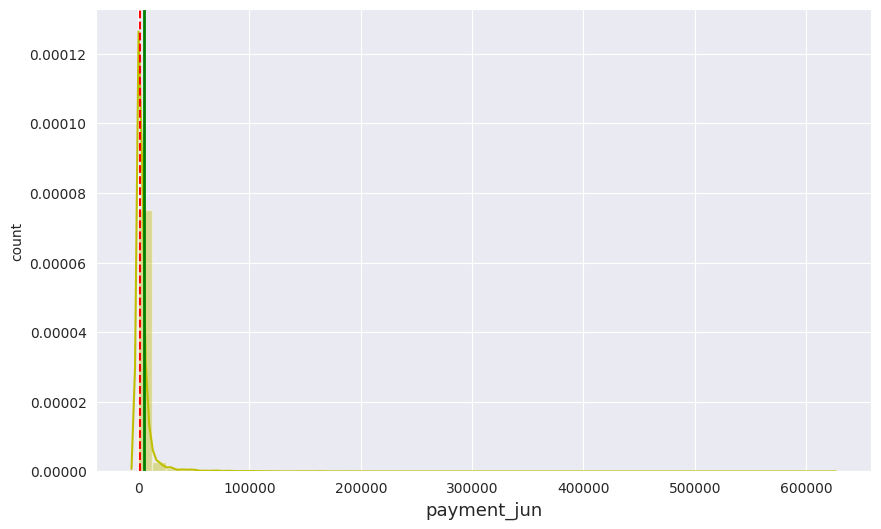

Probablity distribution for payment_may


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


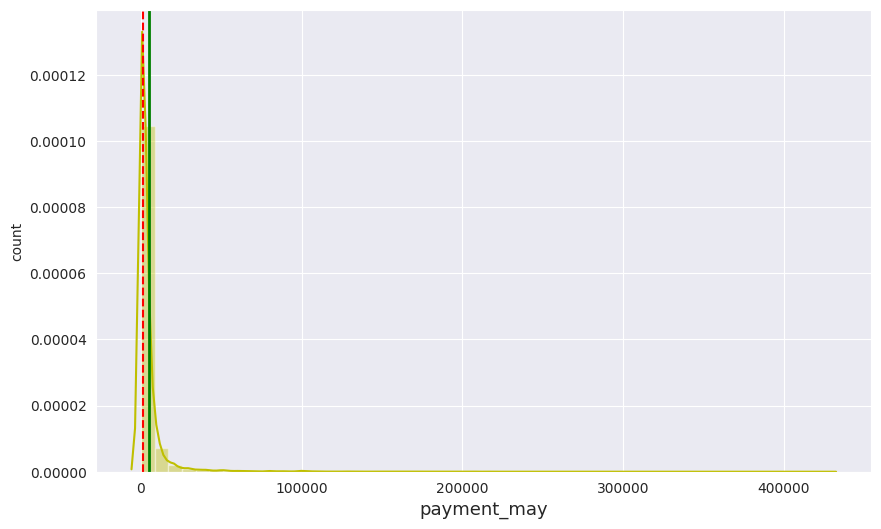

Probablity distribution for payment_april


<ipython-input-327-3124f40cae7e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


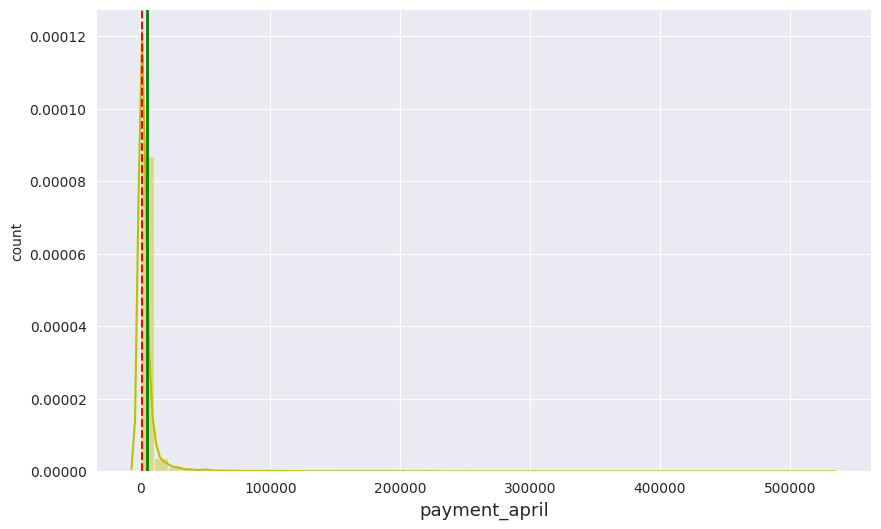

In [327]:
# Chart - 11 visualization code

# Plotting the distributions of all features.
for col in df.columns:
  if col not in ['default','gender', 'educatiom', 'marital_status', 'age' ]:
    print("Probablity distribution for", col)
    plt.figure(figsize=(10,6))
    sns.distplot(df[col], color='y')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
    plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
    plt.show()

##### 1. Why did you pick the specific chart?

We Use Dist plot to See the skewness of the Data.

##### 2. What is/are the insight(s) found from the chart?

* Here we can see that the most of the columns are having Right skewed Data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [328]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [329]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

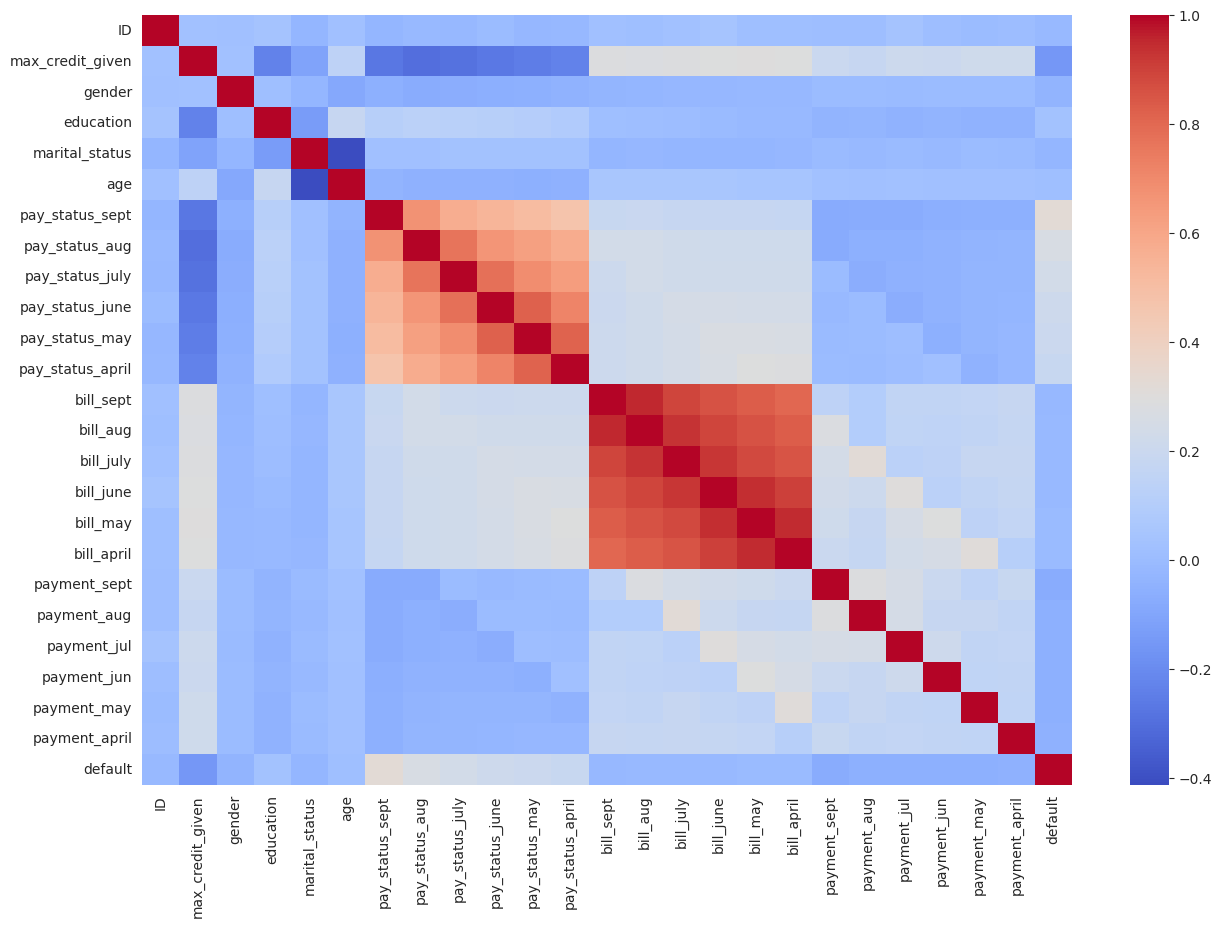

In [330]:
# Correlation Heatmap visualization code
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

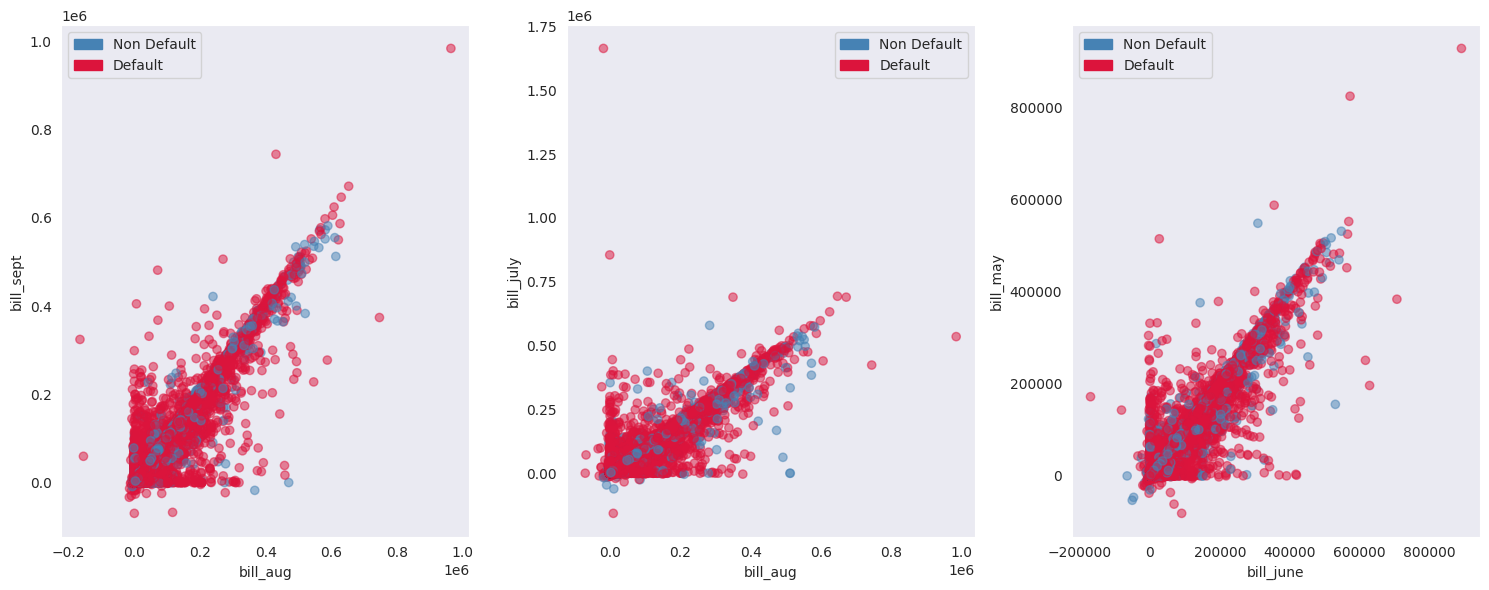

In [331]:
##distribution correlated features -- scatter interaction
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


data_np=df.to_numpy()
target=df.default

# variables to 
bill_sept = df['bill_sept'].to_numpy()
bill_aug = df['bill_aug'].to_numpy()
bill_july = df['bill_july'].to_numpy()
bill_june = df['bill_june'].to_numpy()
bill_may = df['bill_may'].to_numpy()
bill_april = df['bill_april'].to_numpy()
age = df['age'].to_numpy()
max_credit_given = df['max_credit_given'].to_numpy()
payment_aug = df['payment_aug'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(bill_sept, bill_aug, c=target, cmap = ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('bill_aug')
ax[0].set_ylabel('bill_sept')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(bill_aug, bill_july, c=target, cmap = ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('bill_aug')
ax[1].set_ylabel('bill_july')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(bill_june,bill_may, c=target, cmap = ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('bill_june')
ax[2].set_ylabel('bill_may')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

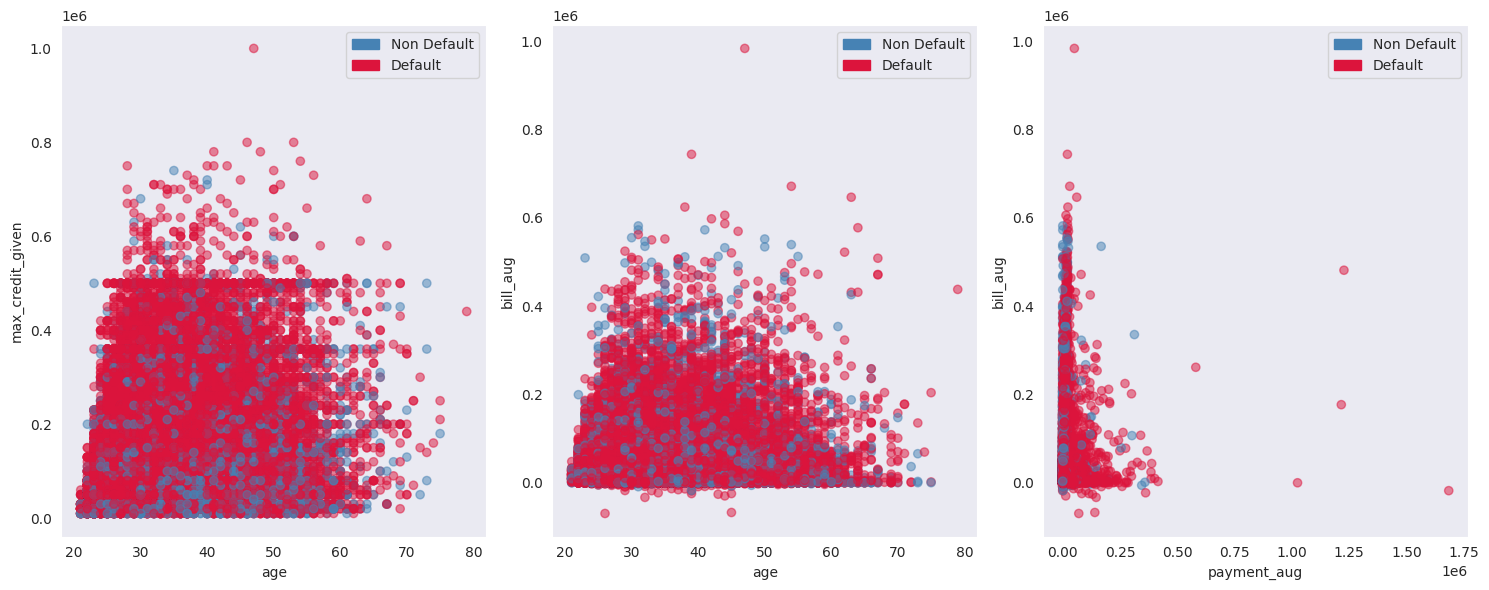

In [332]:
#distribution un-correlated features -- scatter interaction

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(age, max_credit_given, c=target, cmap = ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('age')
ax[0].set_ylabel('max_credit_given')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(age, bill_aug, c=target, cmap = ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('age')
ax[1].set_ylabel('bill_aug')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(payment_aug, bill_aug, c=target, cmap = ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('payment_aug')
ax[2].set_ylabel('bill_aug')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

#### Chart - 15 - Pair Plot 

In [333]:
# Pair Plot visualization code
df.columns

Index(['ID', 'max_credit_given', 'gender', 'education', 'marital_status',
       'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default'],
      dtype='object')

In [334]:
'''SNS_df= df[[ 
       'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default']]
sns.pairplot(SNS_df)'''

"SNS_df= df[[ \n       'pay_status_aug', 'pay_status_july',\n       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',\n       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',\n       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',\n       'payment_may', 'payment_april', 'default']]\nsns.pairplot(SNS_df)"

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

Define the null and alternative hypothesis:
* Null hypothesis: There is no significant difference between the default rates of males and females.

* Alternative hypothesis: There is a significant difference between the default rates of males and females.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [335]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['default'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [336]:
print("P- Value : ", p_value)
print("Chi2 : ", chi2)
print("Degree Of Freedom : ", dof)
print("Expected : ", expected)

P- Value :  4.944678999412044e-12
Chi2 :  47.70879689062111
Degree Of Freedom :  1
Expected :  [[ 9258.3744  2629.6256]
 [14105.6256  4006.3744]]


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [337]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [338]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Data set having no missing values

In [339]:
# Handling Missing Values & Missing Value Imputation


### 2. Handling Outliers

In [340]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [341]:
# Encode your categorical columns
# Set 'category' type to categorical attributes
'''for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  data[att] = data[att].astype('category')

# one-hot encoding
data=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),
                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                data],axis=1)
# drop original columns
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
data.head() '''

"for att in ['SEX', 'EDUCATION', 'MARRIAGE']:\n  data[att] = data[att].astype('category')\n\n# one-hot encoding\ndata=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),\n                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), \n                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),\n                data],axis=1)\n# drop original columns\ndata.drop(['EDUCATION'],axis=1, inplace=True)\ndata.drop(['SEX'],axis=1, inplace=True)\ndata.drop(['MARRIAGE'],axis=1, inplace=True)\n# print samples\ndata.head() "

In [342]:
for col in ["gender",'education', "marital_status"]:
  df[col] = df[col].astype("category")   ## converting the data type integer into categorical 
  
   

In [343]:
## One- hote encoding
df = pd.concat([pd.get_dummies(df['gender'], prefix = 'gender'),
                pd.get_dummies(df['education'], prefix = 'educatiom'),
                pd.get_dummies(df['marital_status']), df], axis = 1)

In [344]:
## droping the  encoded columns.
df.drop(['education'], axis = 1, inplace = True)

df.drop(['gender'], axis = 1, inplace = True)

df.drop(['marital_status'], axis = 1, inplace = True)

df.drop(['ID'], axis = 1, inplace = True)

In [345]:
## lets check the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender_1          30000 non-null  uint8
 1   gender_2          30000 non-null  uint8
 2   educatiom_1       30000 non-null  uint8
 3   educatiom_2       30000 non-null  uint8
 4   educatiom_3       30000 non-null  uint8
 5   educatiom_4       30000 non-null  uint8
 6   1                 30000 non-null  uint8
 7   2                 30000 non-null  uint8
 8   3                 30000 non-null  uint8
 9   max_credit_given  30000 non-null  int64
 10  age               30000 non-null  int64
 11  pay_status_sept   30000 non-null  int64
 12  pay_status_aug    30000 non-null  int64
 13  pay_status_july   30000 non-null  int64
 14  pay_status_june   30000 non-null  int64
 15  pay_status_may    30000 non-null  int64
 16  pay_status_april  30000 non-null  int64
 17  bill_sept         30000 non-nul

In [346]:
df.head()   ## lets look at the encoded columns

,gender_1,gender_2,educatiom_1,educatiom_2,educatiom_3,educatiom_4,1,2,3,max_credit_given,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
0,0,1,0,1,0,0,1,0,0,20000,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,1,0,0,0,1,0,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,0,1,0,0,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,1,0,0,1,0,0,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

An integer encoding may impose some ordinal relationship between categorical variables that does not exist, for this reason a one-hot encoding is performed. Categorical variable such as gender, marital_status and education are turned into one-hot variables in order to remove any orders that in this case have no meaning.

A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [347]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [348]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [349]:
# Transform Your data

### 6. Data Scaling

Fristly we will go with the min max Scaler

In [350]:
df.columns

Index([        'gender_1',         'gender_2',      'educatiom_1',
            'educatiom_2',      'educatiom_3',      'educatiom_4',
                        1,                  2,                  3,
       'max_credit_given',              'age',  'pay_status_sept',
         'pay_status_aug',  'pay_status_july',  'pay_status_june',
         'pay_status_may', 'pay_status_april',        'bill_sept',
               'bill_aug',        'bill_july',        'bill_june',
               'bill_may',       'bill_april',     'payment_sept',
            'payment_aug',      'payment_jul',      'payment_jun',
            'payment_may',    'payment_april',          'default'],
      dtype='object')

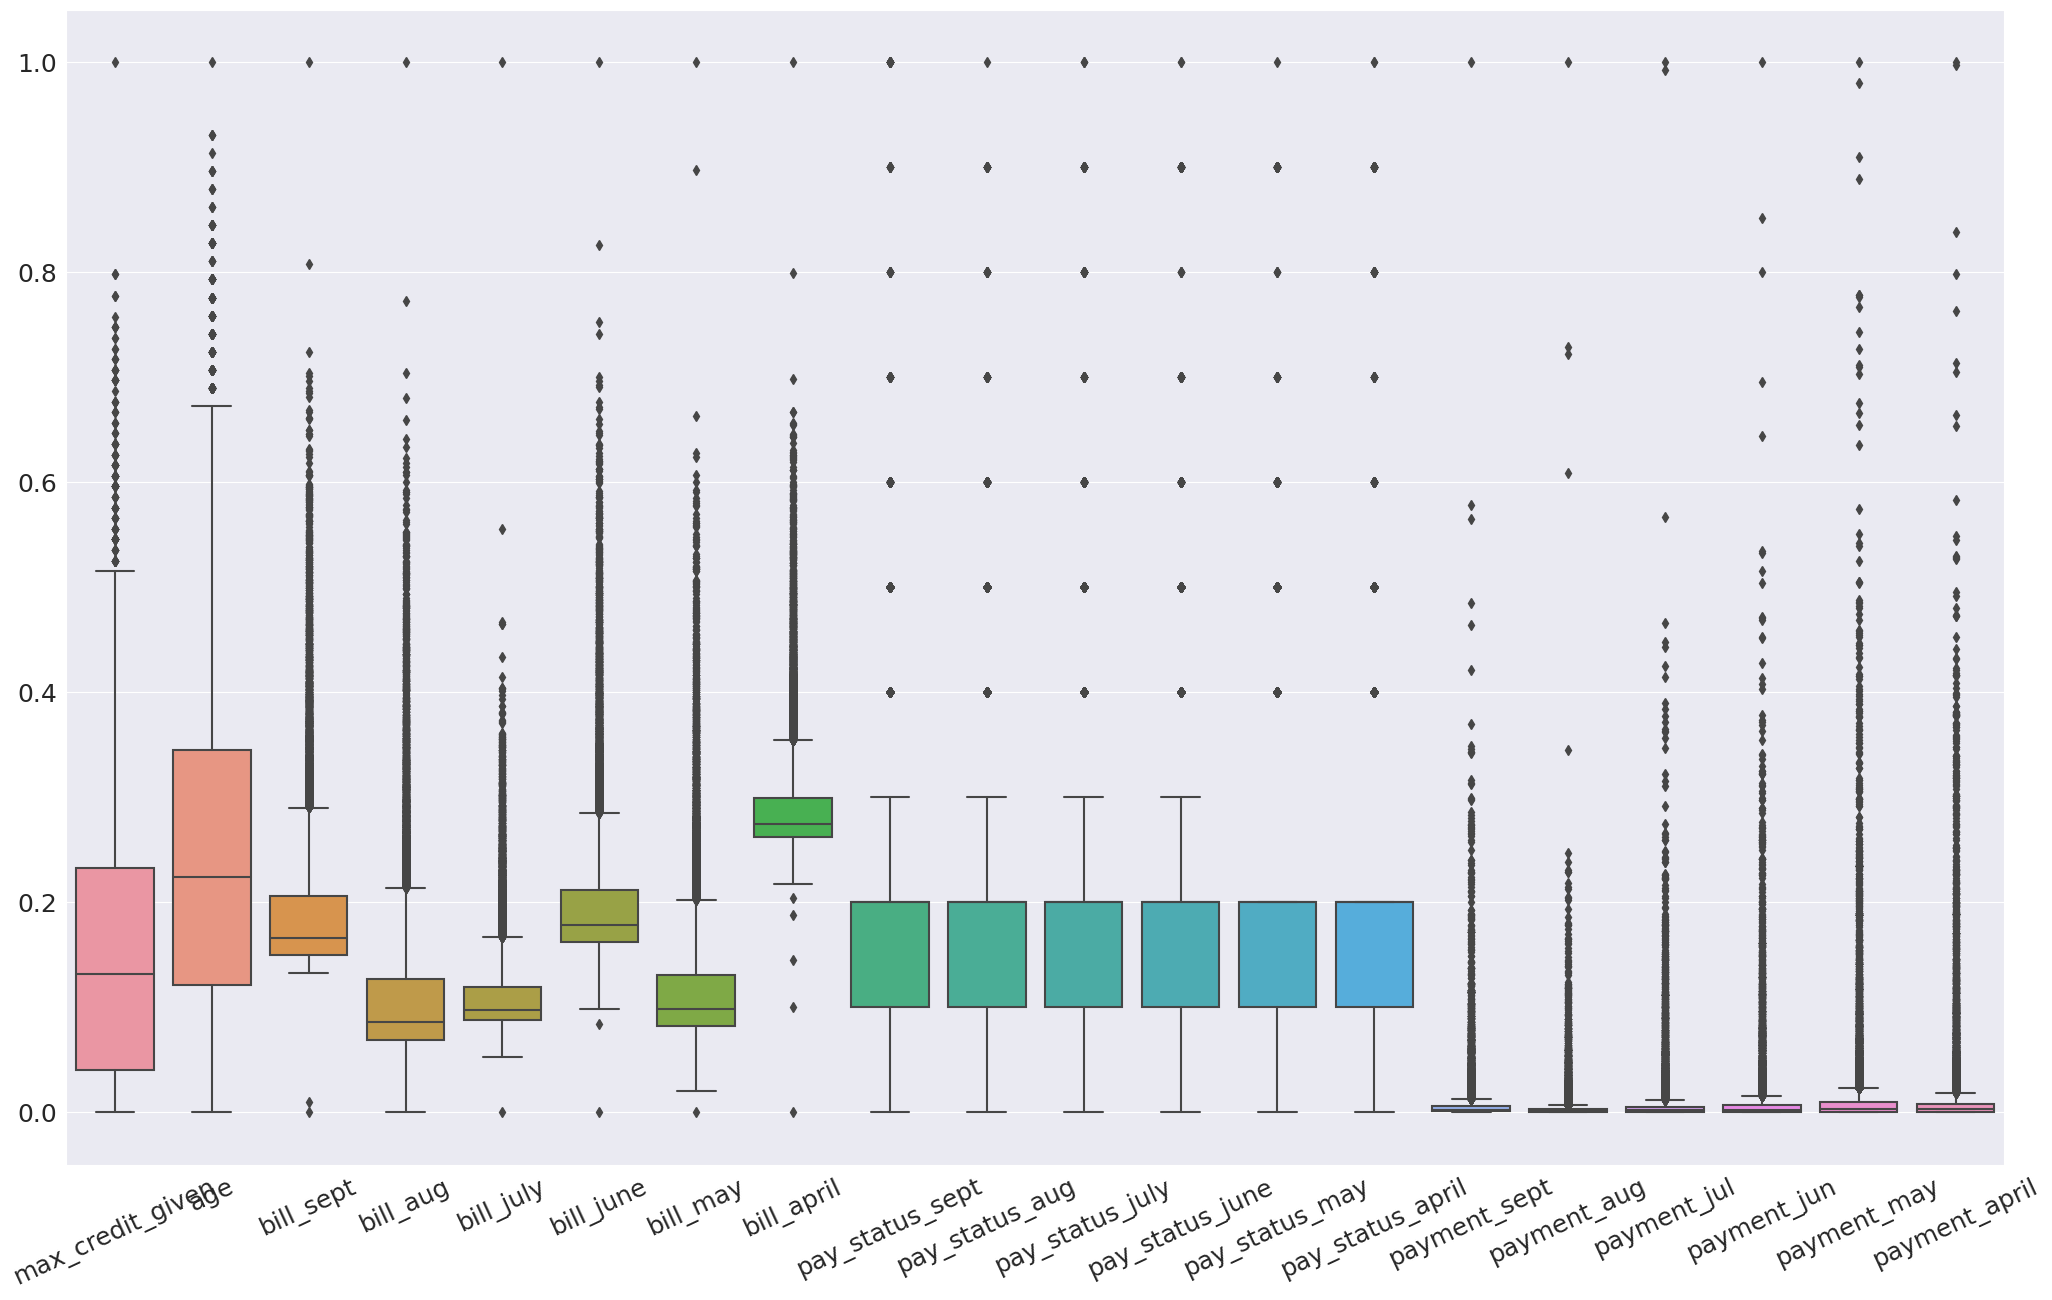

In [351]:
## import library 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['max_credit_given'] = scaler.fit_transform(df['max_credit_given'].values.reshape(-1, 1))
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

list_month1 = ['sept', 'aug', 'jul', 'jun', 'may', 'april']

for i in list_month1 :
    scaler = MinMaxScaler()
    df['payment_' + i] = scaler.fit_transform(df['payment_' + i].values.reshape(-1, 1))

list_month2 = ['sept', 'aug', 'july', 'june', 'may', 'april']
for i in list_month2:
    scaler = MinMaxScaler()
    df['bill_' + i] = scaler.fit_transform(df['bill_' + i].values.reshape(-1, 1))

list_month3 = ['sept', 'aug', 'july', 'june', 'may', 'april']
for i in list_month3:
    scaler = MinMaxScaler()
    df['pay_status_' + i] = scaler.fit_transform(df['pay_status_' + i].values.reshape(-1, 1))
    
# BOXPLOT
cols = ['max_credit_given','age',
        'bill_sept','bill_aug','bill_july', 'bill_june','bill_may', 'bill_april',  
        'pay_status_sept', 'pay_status_aug',  'pay_status_july',  'pay_status_june', 'pay_status_may', 'pay_status_april',
        'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april',]

fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot(111)

sns.boxplot(data=df[cols])

plt.xticks(np.arange(0, len(cols)), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('Fig - Boxplot')

In [352]:
df.head()

,gender_1,gender_2,educatiom_1,educatiom_2,educatiom_3,educatiom_4,1,2,3,max_credit_given,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
0,0,1,0,1,0,0,1,0,0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0,1,0,1,0,0,0,1,0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0,1,0,1,0,0,0,1,0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0,1,0,1,0,0,1,0,0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,1,0,0,1,0,0,1,0,0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


In [353]:
df.columns

Index([        'gender_1',         'gender_2',      'educatiom_1',
            'educatiom_2',      'educatiom_3',      'educatiom_4',
                        1,                  2,                  3,
       'max_credit_given',              'age',  'pay_status_sept',
         'pay_status_aug',  'pay_status_july',  'pay_status_june',
         'pay_status_may', 'pay_status_april',        'bill_sept',
               'bill_aug',        'bill_july',        'bill_june',
               'bill_may',       'bill_april',     'payment_sept',
            'payment_aug',      'payment_jul',      'payment_jun',
            'payment_may',    'payment_april',          'default'],
      dtype='object')

<Axes: >

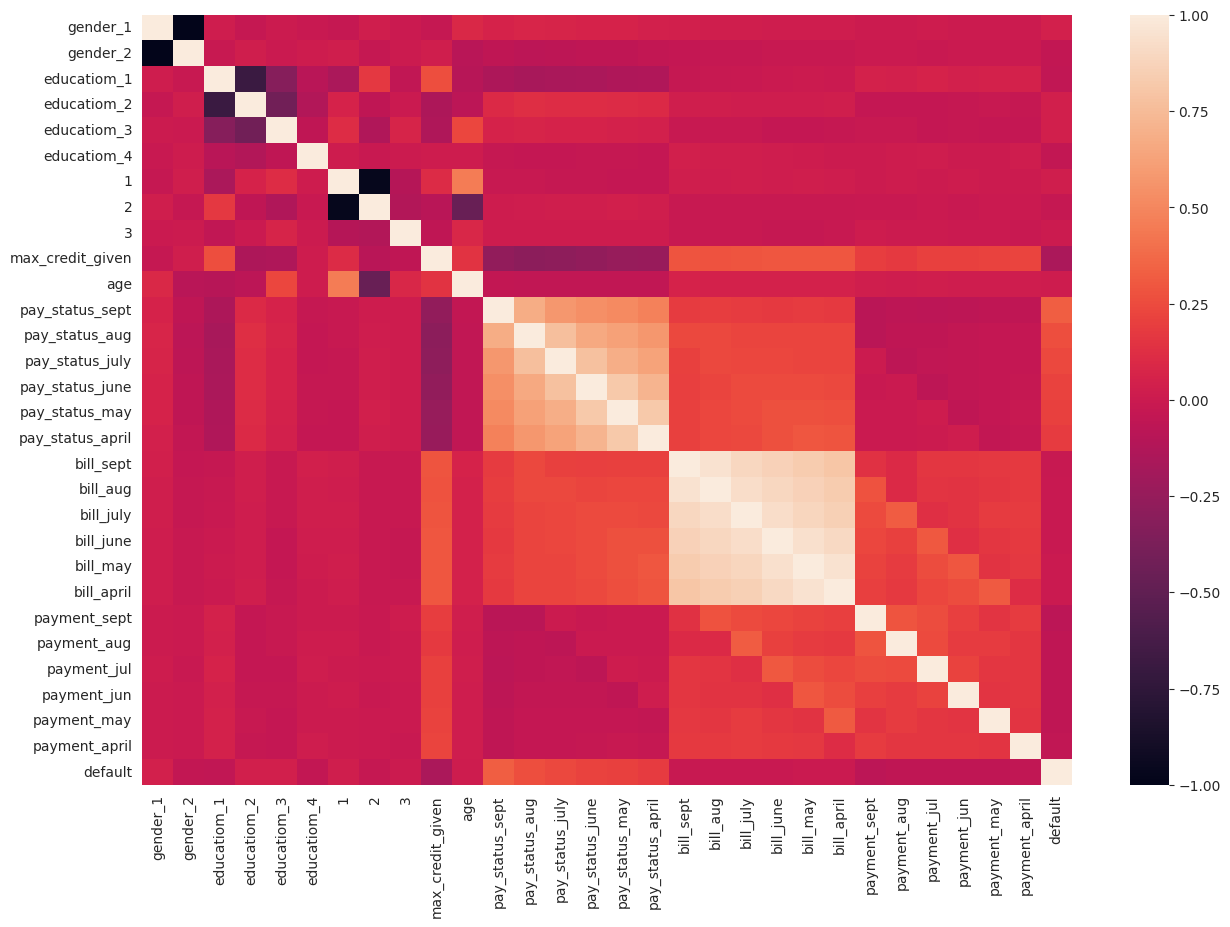

In [354]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr)

In [355]:
df.columns

Index([        'gender_1',         'gender_2',      'educatiom_1',
            'educatiom_2',      'educatiom_3',      'educatiom_4',
                        1,                  2,                  3,
       'max_credit_given',              'age',  'pay_status_sept',
         'pay_status_aug',  'pay_status_july',  'pay_status_june',
         'pay_status_may', 'pay_status_april',        'bill_sept',
               'bill_aug',        'bill_july',        'bill_june',
               'bill_may',       'bill_april',     'payment_sept',
            'payment_aug',      'payment_jul',      'payment_jun',
            'payment_may',    'payment_april',          'default'],
      dtype='object')

Probablity distribution for max_credit_given


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


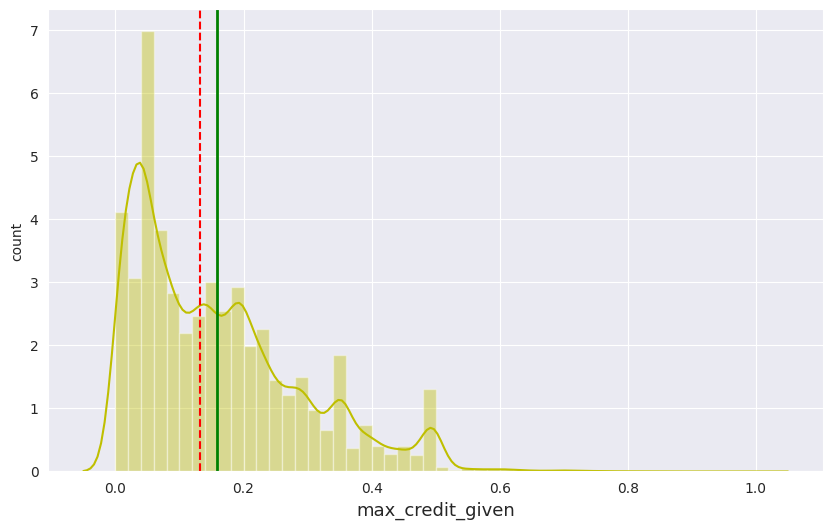

Probablity distribution for pay_status_sept


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


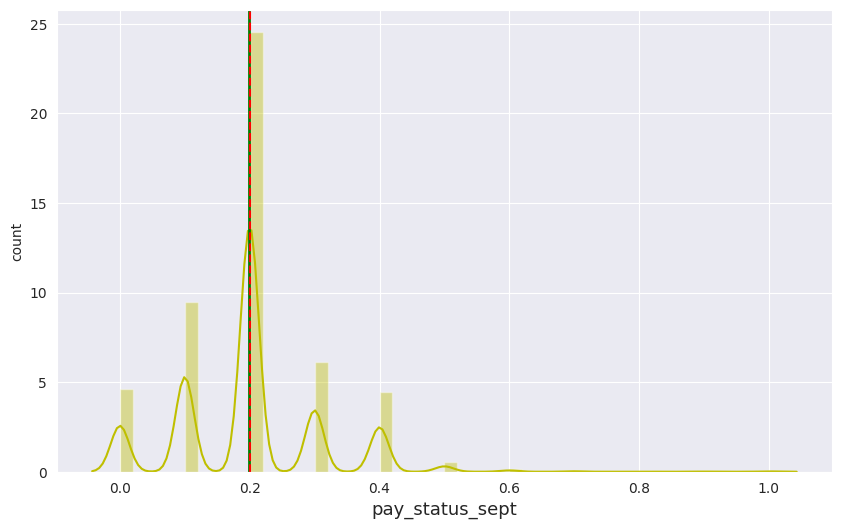

Probablity distribution for pay_status_aug


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


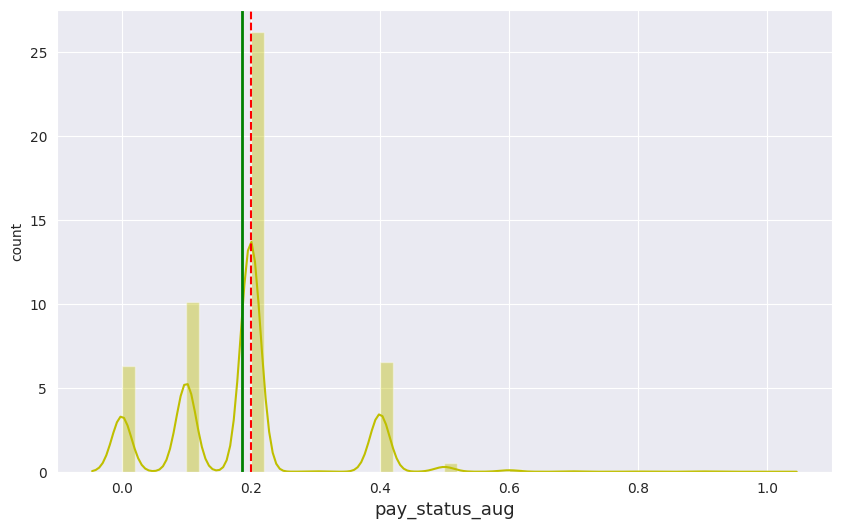

Probablity distribution for pay_status_july


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


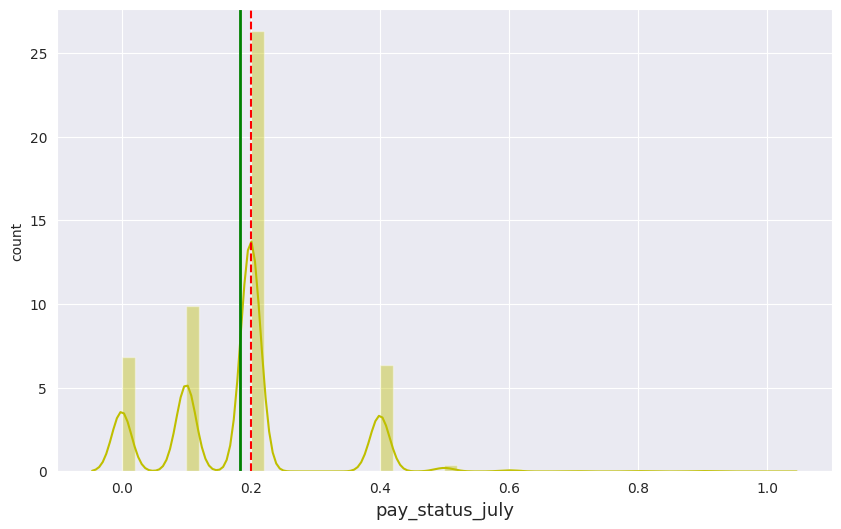

Probablity distribution for pay_status_june


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


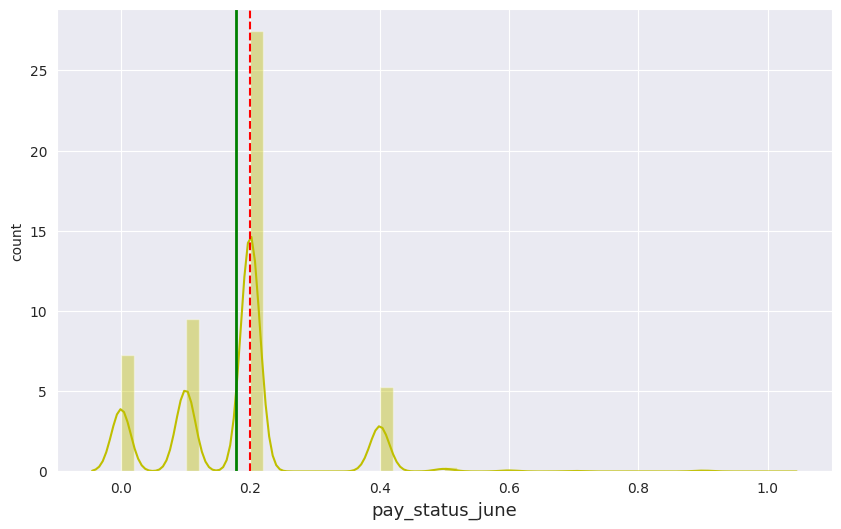

Probablity distribution for pay_status_may


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


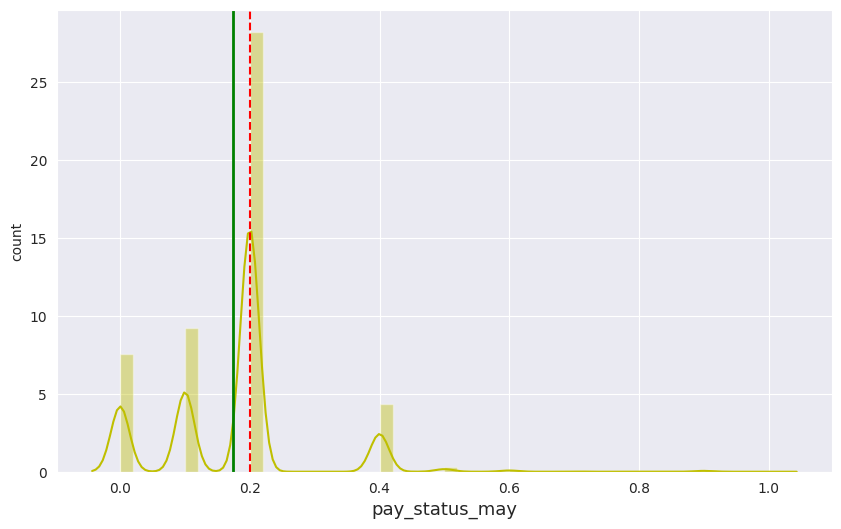

Probablity distribution for pay_status_april


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


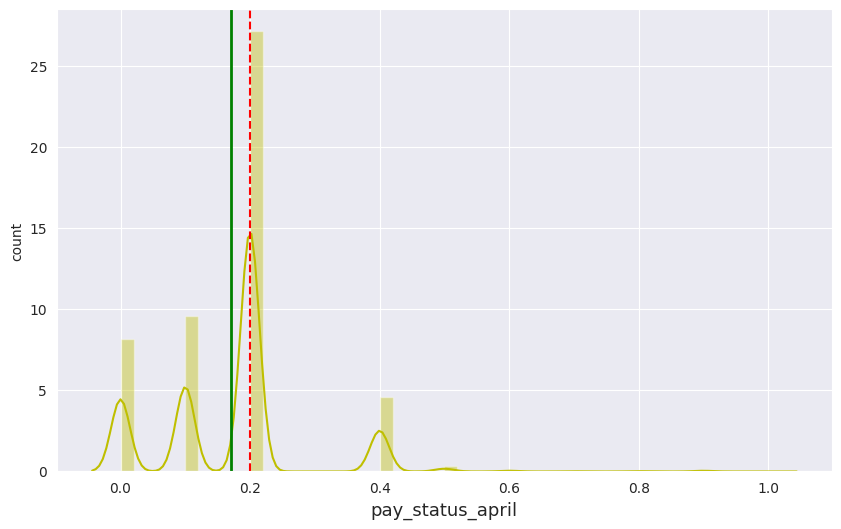

Probablity distribution for bill_sept


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


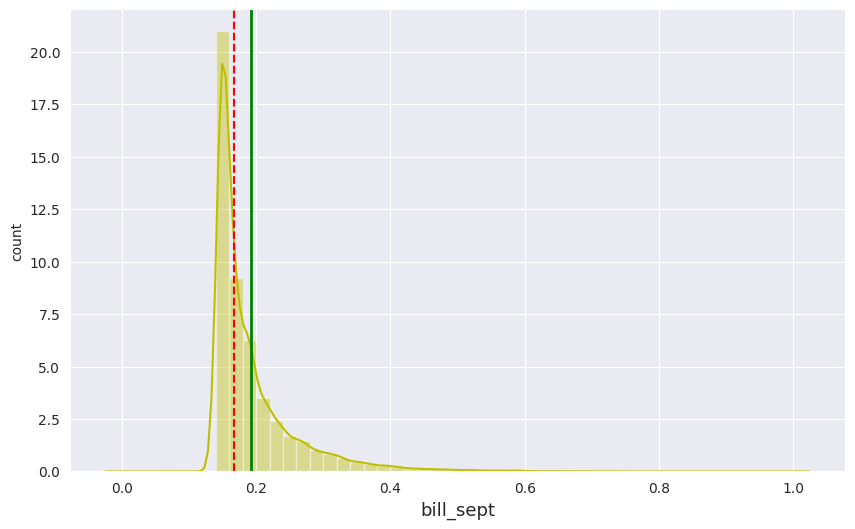

Probablity distribution for bill_aug


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


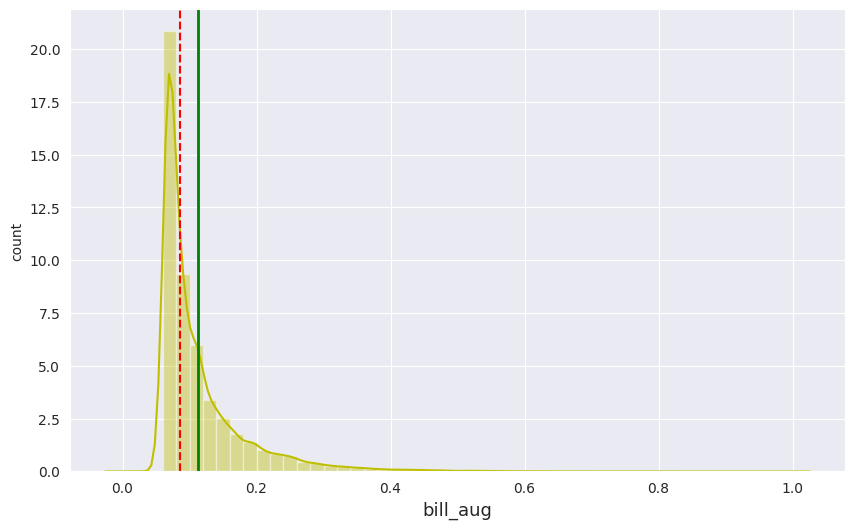

Probablity distribution for bill_july


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


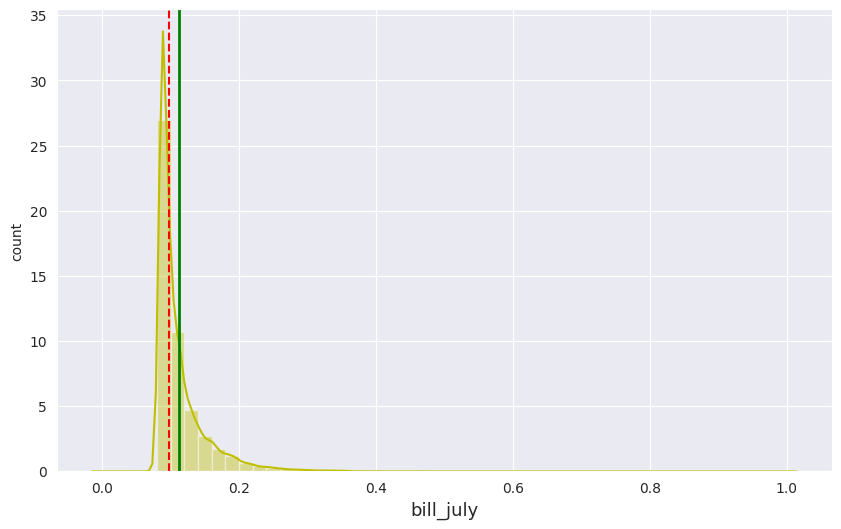

Probablity distribution for bill_june


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


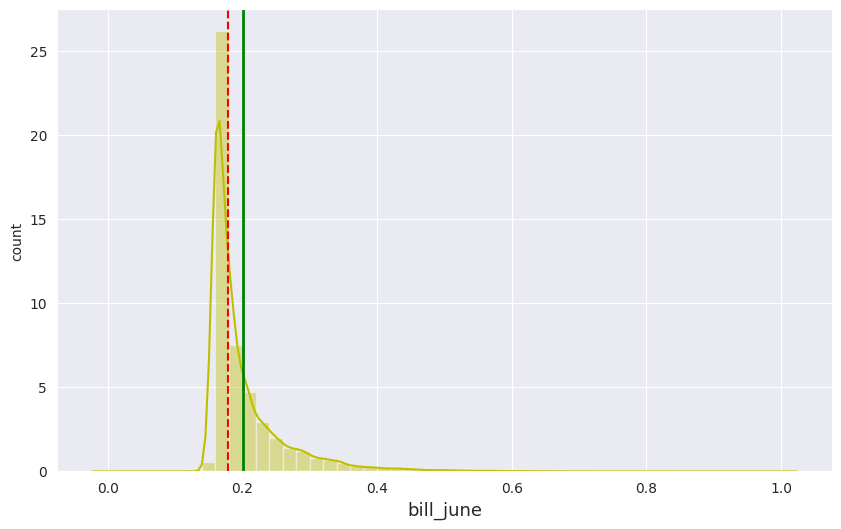

Probablity distribution for bill_may


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


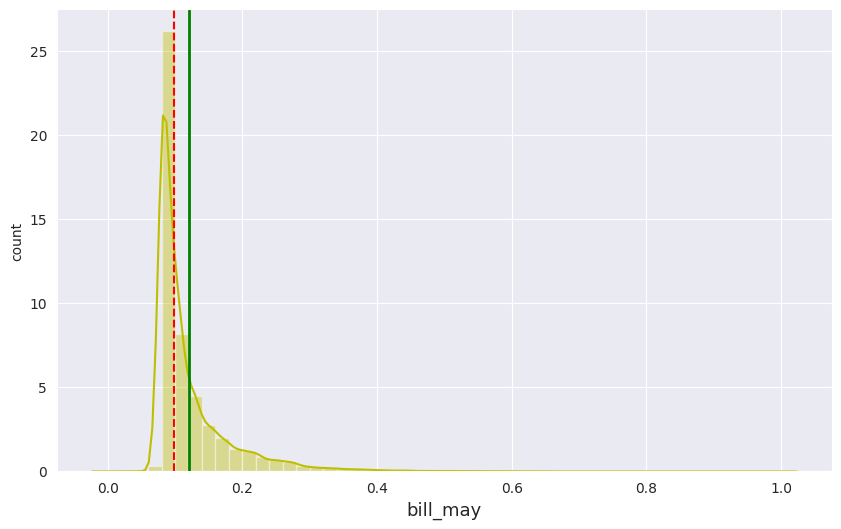

Probablity distribution for bill_april


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


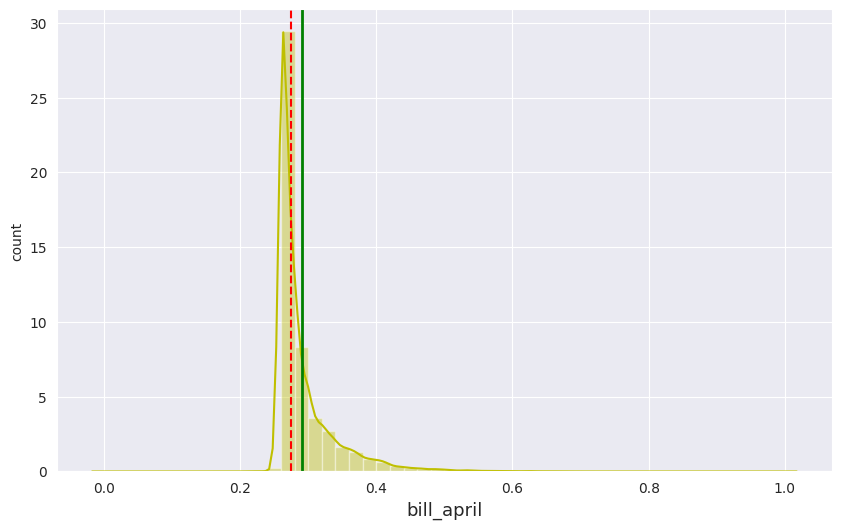

Probablity distribution for payment_sept


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


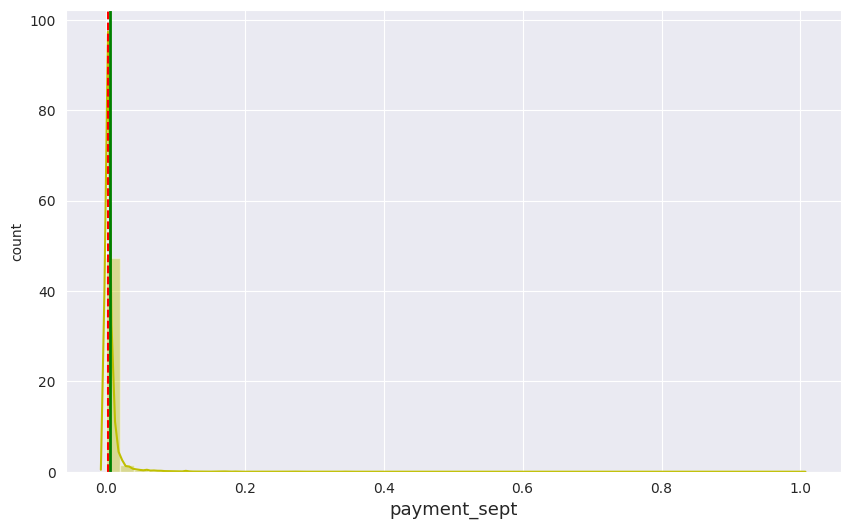

Probablity distribution for payment_aug


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


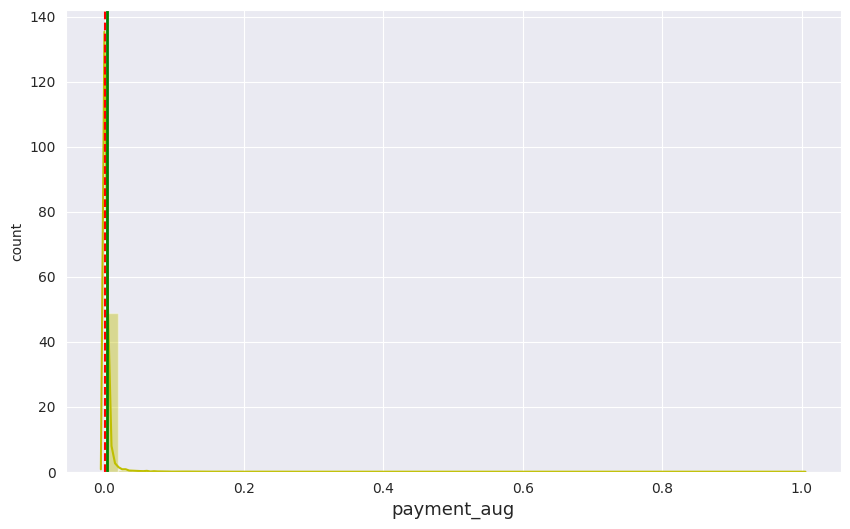

Probablity distribution for payment_jul


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


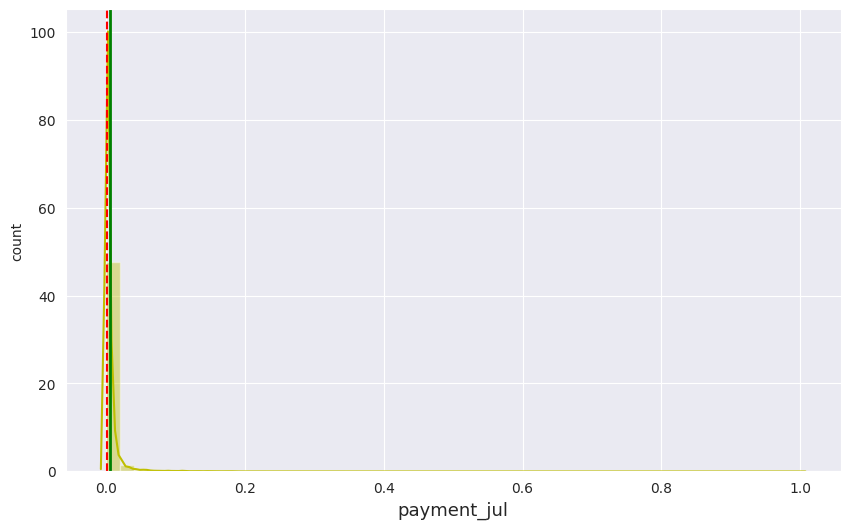

Probablity distribution for payment_jun


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


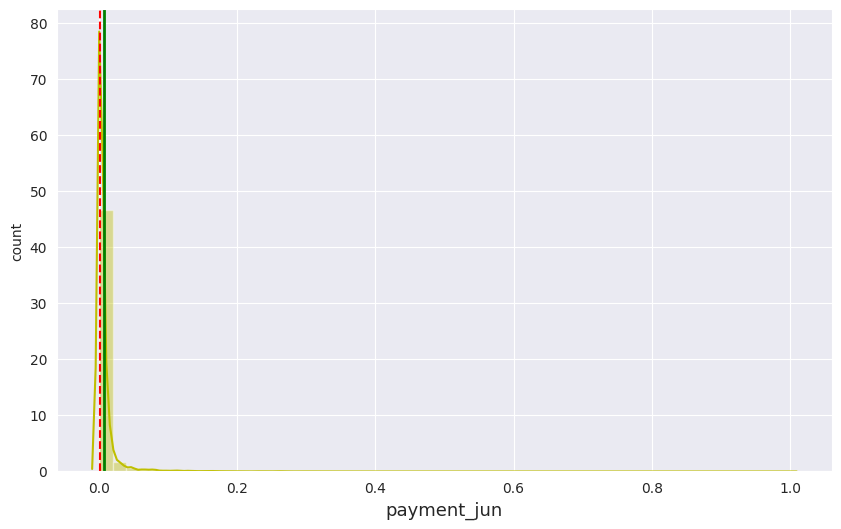

Probablity distribution for payment_may


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


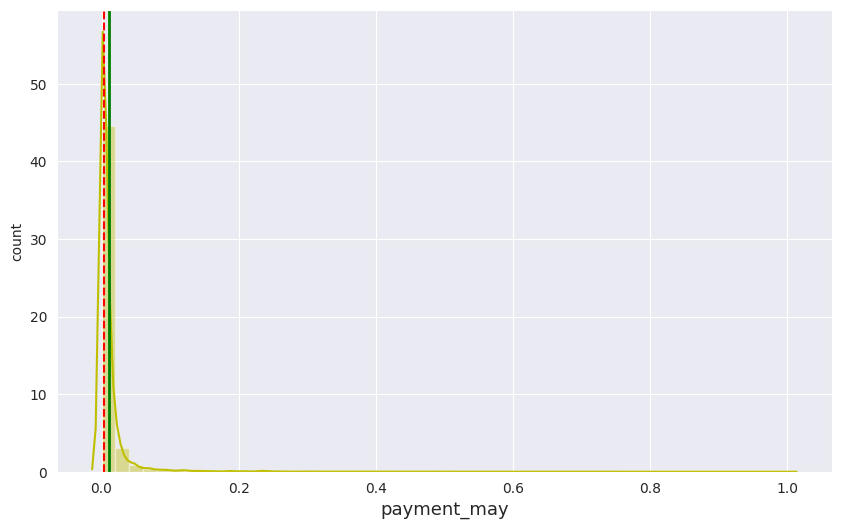

Probablity distribution for payment_april


<ipython-input-356-db5bd740021e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


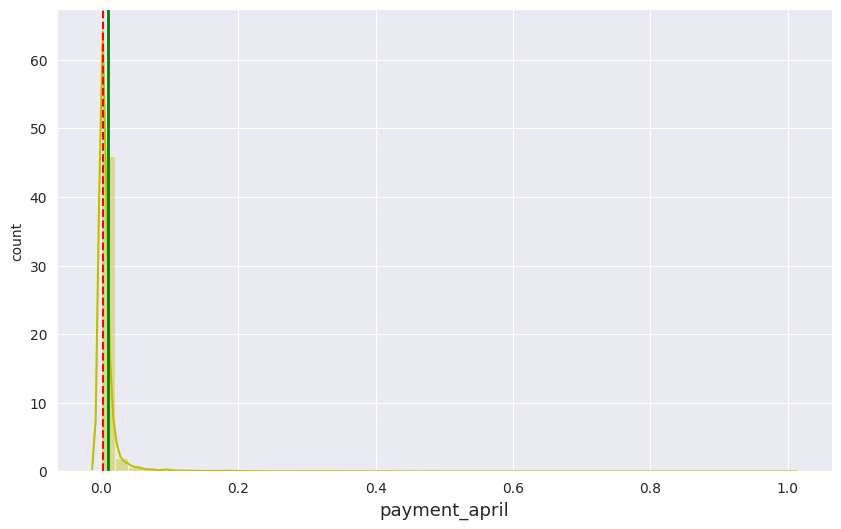

In [356]:
# Chart - 5 visualization code

# Plotting the distributions of all features.
for col in df.columns:
  if col not in ['default','gender_1', 'gender_2', 'educatiom_1', 'educatiom_2', 'educatiom_3','educatiom_4', 1, 2, 3, 'age' ]:
    print("Probablity distribution for", col)
    plt.figure(figsize=(10,6))
    sns.distplot(df[col], color='y')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
    plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
    plt.show()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [357]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [358]:
## dividing the data into independent and dependent variable Xx and y respectively

x = df.drop(['default'], axis = 1)  ## independent  variable 

y  = df["default"] ## Target variable 





In [359]:
# Check data set dimension
print(x.shape)
print("Number of samples:", x.shape[0])
print("Number of attributes:", x.shape[1])

(30000, 29)
Number of samples: 30000
Number of attributes: 29


### 8. Data Splitting

In [372]:
df.columns

Index([        'gender_1',         'gender_2',      'educatiom_1',
            'educatiom_2',      'educatiom_3',      'educatiom_4',
                        1,                  2,                  3,
       'max_credit_given',              'age',  'pay_status_sept',
         'pay_status_aug',  'pay_status_july',  'pay_status_june',
         'pay_status_may', 'pay_status_april',        'bill_sept',
               'bill_aug',        'bill_july',        'bill_june',
               'bill_may',       'bill_april',     'payment_sept',
            'payment_aug',      'payment_jul',      'payment_jun',
            'payment_may',    'payment_april',          'default'],
      dtype='object')

In [384]:
# Split your data to train and test. Choose Splitting ratio wisely.
## importing the libraries 

from sklearn.model_selection import train_test_split 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

x_test.columns = x_test.columns.astype(str)

##### What data splitting ratio have you used and why? 

we split the data in 

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [383]:
# Handling Imbalanced Dataset (If needed)

from imblearn.over_sampling import SMOTE

# Balance the dataset using SMOTE
smote = SMOTE()
x_train.columns = x_train.columns.astype(str)  # convert feature names to strings
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1  K - Nearest 

In [398]:
# ML Model - 1 Implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

# Instantiate the models
knn = KNeighborsClassifier()


# Train the models on the balanced training data
knn.fit(x_train_balanced, y_train_balanced)

# Predict on the modelfrom sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve

# Define a function to evaluate the model

y_pred = knn.predict(x_test)

# Print the classification report and ROC AUC score
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, knn.predict_proba(x_test)[:,1]))




              precision    recall  f1-score   support

           0       0.86      0.69      0.76      4683
           1       0.35      0.59      0.44      1317

    accuracy                           0.67      6000
   macro avg       0.60      0.64      0.60      6000
weighted avg       0.75      0.67      0.69      6000

ROC AUC Score: 0.6874427139246286


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Precision is the ratio of true positive predictions to the total number of positive predictions. Recall is the ratio of true positive predictions to the total number of actual positive cases. F1-score is the harmonic mean of precision and recall.

Looking at the results of the model, we can see that the precision of class 0 (0.86) is higher than that of class 1 (0.35), indicating that the model is better at correctly predicting class 0. On the other hand, the recall of class 1 (0.59) is higher than that of class 0 (0.69), indicating that the model is better at correctly identifying class 1.

The F1-score for class 0 is 0.76 and for class 1 it is 0.44. The weighted average F1-score of the model is 0.69. The accuracy of the model is 0.67, which means that the model correctly predicted 67% of the cases.

Overall, the macro-average F1-score of the model is 0.60, which means that the model is not equally good at predicting both classes. The weighted average precision and recall are 0.75 and 0.67, respectively, indicating that the model is better at predicting class 0.

* The model has an overall accuracy of 0.67, which means it correctly predicted 67% of the cases.

* The model has a higher precision for non-default cases (class 0) (0.86) compared to default cases (class 1) (0.35), indicating that it is better at correctly identifying cases that are likely to be non-default.
* The model has a higher recall for default cases (class 1) (0.59) compared to non-default cases (class 0) (0.69), indicating that it is better at correctly identifying cases that are likely to be default.
* The F1-score for non-default cases (class 0) is 0.76 and for default cases (class 1) it is 0.44. The weighted average F1-score of the model is 0.69, which means that the model is moderately good at correctly identifying both non-default and default cases.

Based on these results, the KNN model is moderately good at predicting default payment. However, the lower precision and F1-score for default cases (class 1) suggest that the model may not be as reliable in identifying default cases as it is in identifying non-default cases. Therefore, further evaluation and improvement may be required to enhance the model's ability to predict default payment more accurately

#### 2. Cross- Validation & Hyperparameter Tuning

In [364]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [365]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [366]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [367]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [368]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [369]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [370]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [371]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***